# Bike Sharing Demand Chap1



시간당 자전거 대여량을 예측하는 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 입니다. 워싱턴 D.C 소재의 자전거 대여 스타트업 [Capital Bikeshare](https://www.capitalbikeshare.com/)의 데이터를 활용하여, 특정 시간대에 얼마나 많은 사람들이 자전거를 대여하는지 예측하는 것이 목표입니다.

사람들이 자전거를 대여하는데는 많은 요소가 관여되어 있을 겁니다. 가령 **시간(새벽보다 낮에 많이 빌리겠죠)**, **날씨(비가 오면 자전거를 대여하지 않을 겁니다)**, **근무일(근무 시간에는 자전거를 대여하지 않겠죠)** 등. 이런 모든 요소를 조합하여 워싱턴 D.C의 자전거 교통량을 예측해주세요. 이번 경진대회에서는 기존까지 배웠던 프로그래밍 언어와 인공지능&머신러닝 능력 외에도, 자전거 렌탈 시장에 대한 약간의 전문지식, 그리고 일반인의 기초 상식을 총동원 할 수 있습니다.

## 컬럼 설명

(데이터는 [다음의 링크](https://www.kaggle.com/c/bike-sharing-demand/data)에서 다운받으실 수 있습니다)

  * **datetime** - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)
  * **season** - 계절. 봄(1), 여름(2), 가을(3), 겨울(4) 순으로 표현합니다.
  * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
  * **workingday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
  * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
    * 1: 아주 깨끗한 날씨입니다. 또는 아주 약간의 구름이 끼어있습니다.
    * 2: 약간의 안개와 구름이 끼어있는 날씨입니다.
    * 3: 약간의 눈, 비가 오거나 천둥이 칩니다.
    * 4: 아주 많은 비가 오거나 우박이 내립니다.
  * **temp** - 온도. 섭씨(Celsius)로 적혀있습니다.
  * **atemp** - 체감 온도. 마찬가지로 섭씨(Celsius)로 적혀있습니다.
  * **humidity** - 습도.
  * **windspeed** - 풍속.
  * **casual** - 비회원(non-registered)의 자전거 대여량.
  * **registered** - 회원(registered)의 자전거 대여량.
  * **count** - 총 자전거 대여랑. 비회원(casual) + 회원(registered)과 동일합니다.

In [1]:
# 필요한 패키지를 import 하는 구간
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [2]:
# 화면에 출력하는 데이터 프레임의 최대 row 수를 1000으로 설정합니다.
pd.set_option('display.max_rows', 1000)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 1000으로 설정합니다.
pd.set_option('display.max_columns', 1000)

In [3]:
import matplotlib
from IPython.display import set_matplotlib_formats

# Mac OS를 이용하고 있기 떄문에 AppleGothic을 설정했습니다.
# 윈도우의 경우 다른 폰트를 사용해주셔야 합니다. 나눔폰트가 있는 경우 'NanumGothic' 없는 경우에는 'Malgun Gothic'을 사용해주세요.
# matplotlib.rc('font', family='AppleGothic')
matplotlib.rc('font', family='NanumGothic')

# 별도로, 폰트를 바꿀 경우 마이너스가 표시되지 않는 경우도 있는데 이를 막아주는 코드입니다.
matplotlib.rc('axes', unicode_minus=False)

# retina 옵션을 통해 해상도를 올립니다.
set_matplotlib_formats('retina')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 속성(컬럼) 설명(Column explain)

 * **datetime** - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)
 * **season** - 계절. 봄(1), 여름(2), 가을(3), 겨울(4) 순으로 표현합니다.
 * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
 * **workingday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
 * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
   * 1: 아주 깨끗한 날씨입니다. 또는 아주 약간의 구름이 끼어있습니다.
   * 2: 약간의 안개와 구름이 끼어있는 날씨입니다.
   * 3: 약간의 눈, 비가 오거나 천둥이 칩니다.
   * 4: 아주 많은 비가 오거나 우박이 내립니다.
 * **temp** - 온도. 섭씨(Celsius)로 적혀있습니다.
 * **atemp** - 체감 온도. 마찬가지로 섭씨(Celsius)로 적혀있습니다.
 * **humidity** - 습도.
 * **windspeed** - 풍속.
 * **casual** - 비회원(non-registered)의 자전거 대여량.
 * **registered** - 회원(registered)의 자전거 대여량.
 * **count** - 총 자전거 대여랑. 비회원(casual) + 회원(registered)과 동일합니다.

### 데이터 셋 로드(Load Dataset)

In [4]:
# 데이터 셋을 로드하는 커널입니다
# 각각 data 폴더 내에 있는 train.csv, test.csv파일을 불러옵니다
# parse_dates : datetime 컬럼을 실제 날짜 처럼 연산하게 parsing 처리합니다
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])
test = pd.read_csv("data/test.csv", parse_dates=["datetime"])

# 불러온 train데이터를 확인합니다.
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
# 불러온 test 데이터를 확인합니다.
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## 데이터 전처리(Data Preprocessing)

머신러닝 알고리즘에 대입하기 위해 데이터 전처리(Preprocessing) 작업을 진행합니다.
여기서 사용할 데이터는 대부분의 데이터가 전처리 되어 있습니다.(예를 들면 season 컬럼을 봤을 때 "Spring"과 같이 문자열로 표현하지 않고 1(정수)로 처리가 되어 있습니다) 따라서 몇가지 간단한 처리만 해주게 되면 바로 머신러닝 모델에 대입할 수 있습니다.

### Parse datetime

날짜 컬럼을 확인해 보면 여러개의 숫자로 되어 있습니다(연-월-일 시:분:초). 하지만 이 데이터는 숫자 처럼 보이지만 숫자는 아닙니다(자료형 : object, datetime64, 해당 값에 하이픈(-), 콜론(:)이 있기 때문) 따라서 머신러닝 알고리즘이 적용될 수 있게 숫자형 데이터로 전처리를 해야 합니다.

간단하게 연, 월, 시, 분, 초를 따로 나누는 작업입니다.(6개의 다른 컬럼으로 나누어 전처리)

In [6]:
# train 데이터 전처리
# 먼저 datetime 데이터 처리 : 연, 월, 일, 시간, 분, 초 등으로 처리
train['datetime-year'] = train['datetime'].dt.year
train['datetime-month'] = train['datetime'].dt.month
train['datetime-day'] = train['datetime'].dt.day
train['datetime-hour'] = train['datetime'].dt.hour
train['datetime-minute'] = train['datetime'].dt.minute
train['datetime-second'] = train['datetime'].dt.second

# dayofweek : 날짜에서 요일(월~일)을 가져오는 기능
# 해당 값은 0(월) ~ 6(일)로 정의되어 있다.
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute",
       "datetime-second"]].head()

(10886, 19)


,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011,1,1,0,0,0
1,2011,1,1,1,0,0
2,2011,1,1,2,0,0
3,2011,1,1,3,0,0
4,2011,1,1,4,0,0


In [7]:
# test 데이터 전처리
# train과 동일하게 진행합니다.
test['datetime-year'] = test['datetime'].dt.year
test['datetime-month'] = test['datetime'].dt.month
test['datetime-day'] = test['datetime'].dt.day
test['datetime-hour'] = test['datetime'].dt.hour
test['datetime-minute'] = test['datetime'].dt.minute
test['datetime-second'] = test['datetime'].dt.second

# 요일의 정보를 추가합니다.
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test[["datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute",
       "datetime-second"]].head()

(6493, 16)


,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011,1,20,0,0,0
1,2011,1,20,1,0,0
2,2011,1,20,2,0,0
3,2011,1,20,3,0,0
4,2011,1,20,4,0,0


In [8]:
print(train.shape)
train.head()

print(test.shape)
test.head()

(10886, 19)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


(6493, 16)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3


In [9]:
# dayofweek가 정수값으로 나타내어져 있어 실제 데이터분석에 다소 불편한 감이 있습니다
# 따라서 사람이 알아보기 쉬운 Mon, Tue, ... , Sun 값으로 바꾸는 과정입니다.
# train 데이터
train.loc[train["datetime-dayofweek"] == 0, "datetime-dayofweek(hum)"] = "Monday"
train.loc[train["datetime-dayofweek"] == 1, "datetime-dayofweek(hum)"] = "Tuesday"
train.loc[train["datetime-dayofweek"] == 2, "datetime-dayofweek(hum)"] = "Wednesday"
train.loc[train["datetime-dayofweek"] == 3, "datetime-dayofweek(hum)"] = "Thursday"
train.loc[train["datetime-dayofweek"] == 4, "datetime-dayofweek(hum)"] = "Friday"
train.loc[train["datetime-dayofweek"] == 5, "datetime-dayofweek(hum)"] = "Saturday"
train.loc[train["datetime-dayofweek"] == 6, "datetime-dayofweek(hum)"] = "Sunday"

print(train.shape)
train[["datetime", "datetime-dayofweek", "datetime-dayofweek(hum)"]].head()

(10886, 20)


,datetime,datetime-dayofweek,datetime-dayofweek(hum)
0,2011-01-01 00:00:00,5,Saturday
1,2011-01-01 01:00:00,5,Saturday
2,2011-01-01 02:00:00,5,Saturday
3,2011-01-01 03:00:00,5,Saturday
4,2011-01-01 04:00:00,5,Saturday


In [10]:
# test 데이터
test.loc[train["datetime-dayofweek"] == 0, "datetime-dayofweek(hum)"] = "Monday"
test.loc[train["datetime-dayofweek"] == 1, "datetime-dayofweek(hum)"] = "Tuesday"
test.loc[train["datetime-dayofweek"] == 2, "datetime-dayofweek(hum)"] = "Wednesday"
test.loc[train["datetime-dayofweek"] == 3, "datetime-dayofweek(hum)"] = "Thursday"
test.loc[train["datetime-dayofweek"] == 4, "datetime-dayofweek(hum)"] = "Friday"
test.loc[train["datetime-dayofweek"] == 5, "datetime-dayofweek(hum)"] = "Saturday"
test.loc[train["datetime-dayofweek"] == 6, "datetime-dayofweek(hum)"] = "Sunday"

print(test.shape)
test[["datetime", "datetime-dayofweek", "datetime-dayofweek(hum)"]].head()

(6493, 17)


,datetime,datetime-dayofweek,datetime-dayofweek(hum)
0,2011-01-20 00:00:00,3,Saturday
1,2011-01-20 01:00:00,3,Saturday
2,2011-01-20 02:00:00,3,Saturday
3,2011-01-20 03:00:00,3,Saturday
4,2011-01-20 04:00:00,3,Saturday


### One-Hot-Encoding

머신러닝 알고리즘을 돌릴 때 수치 데이터의 합에 의한 잘못된 학습을 방지하고자 **One-Hot-Encoding**이 필요한 컬럼 값에 대해 전처리를 진행합니다.

In [11]:
# One-Hot-Encoding을 진행할 컬럼 값  : season, weather, datetime-dayofweek(수치값)
# train데이터에 대한 One-Hot-Encoding
# train : season
train["season_1"] = train["season"] == 1
train["season_2"] = train["season"] == 2
train["season_3"] = train["season"] == 3
train["season_4"] = train["season"] == 4

# train : weather
train["weather_1"] = train["weather"] == 1
train["weather_2"] = train["weather"] == 2
train["weather_3"] = train["weather"] == 3
train["weather_4"] = train["weather"] == 4

# train : datetime-dayofweek
train["dayofweek_0"] = train["datetime-dayofweek"] == 0
train["dayofweek_1"] = train["datetime-dayofweek"] == 1
train["dayofweek_2"] = train["datetime-dayofweek"] == 2
train["dayofweek_3"] = train["datetime-dayofweek"] == 3
train["dayofweek_4"] = train["datetime-dayofweek"] == 4
train["dayofweek_5"] = train["datetime-dayofweek"] == 5
train["dayofweek_6"] = train["datetime-dayofweek"] == 6

print(train.shape)
train.head()

(10886, 35)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(hum),season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,Saturday,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,Saturday,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,Saturday,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,Saturday,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,Saturday,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [12]:
# One-Hot-Encoding을 진행할 컬럼 값  : season, weather, datetime-dayofweek(수치값)
# test데이터에 대한 One-Hot-Encoding
# test : season
test["season_1"] = train["season"] == 1
test["season_2"] = test["season"] == 2
test["season_3"] = test["season"] == 3
test["season_4"] = test["season"] == 4

# test : weather
test["weather_1"] = test["weather"] == 1
test["weather_2"] = test["weather"] == 2
test["weather_3"] = test["weather"] == 3
test["weather_4"] = test["weather"] == 4

# test : datetime-dayofweek
test["dayofweek_0"] = test["datetime-dayofweek"] == 0
test["dayofweek_1"] = test["datetime-dayofweek"] == 1
test["dayofweek_2"] = test["datetime-dayofweek"] == 2
test["dayofweek_3"] = test["datetime-dayofweek"] == 3
test["dayofweek_4"] = test["datetime-dayofweek"] == 4
test["dayofweek_5"] = test["datetime-dayofweek"] == 5
test["dayofweek_6"] = test["datetime-dayofweek"] == 6

print(test.shape)
test.head()

(6493, 32)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(hum),season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3,Saturday,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3,Saturday,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3,Saturday,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3,Saturday,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3,Saturday,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False


In [13]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(hum),season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2,Wednesday,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2,Wednesday,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2,Wednesday,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2,Wednesday,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0,2,Wednesday,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False


In [14]:
test.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(hum),season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19,0,0,0,Wednesday,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20,0,0,0,Wednesday,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21,0,0,0,Wednesday,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22,0,0,0,Wednesday,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,2012,12,31,23,0,0,0,Wednesday,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False


## 탐험적 데이터 분석(EDA)

전처리(Preprocessing)를 끝낸 이후 정리된 데이터를 토대로 **탐험적 데이터 분석(이하 EDA)**를 진행해 보겠습니다.

### datetime

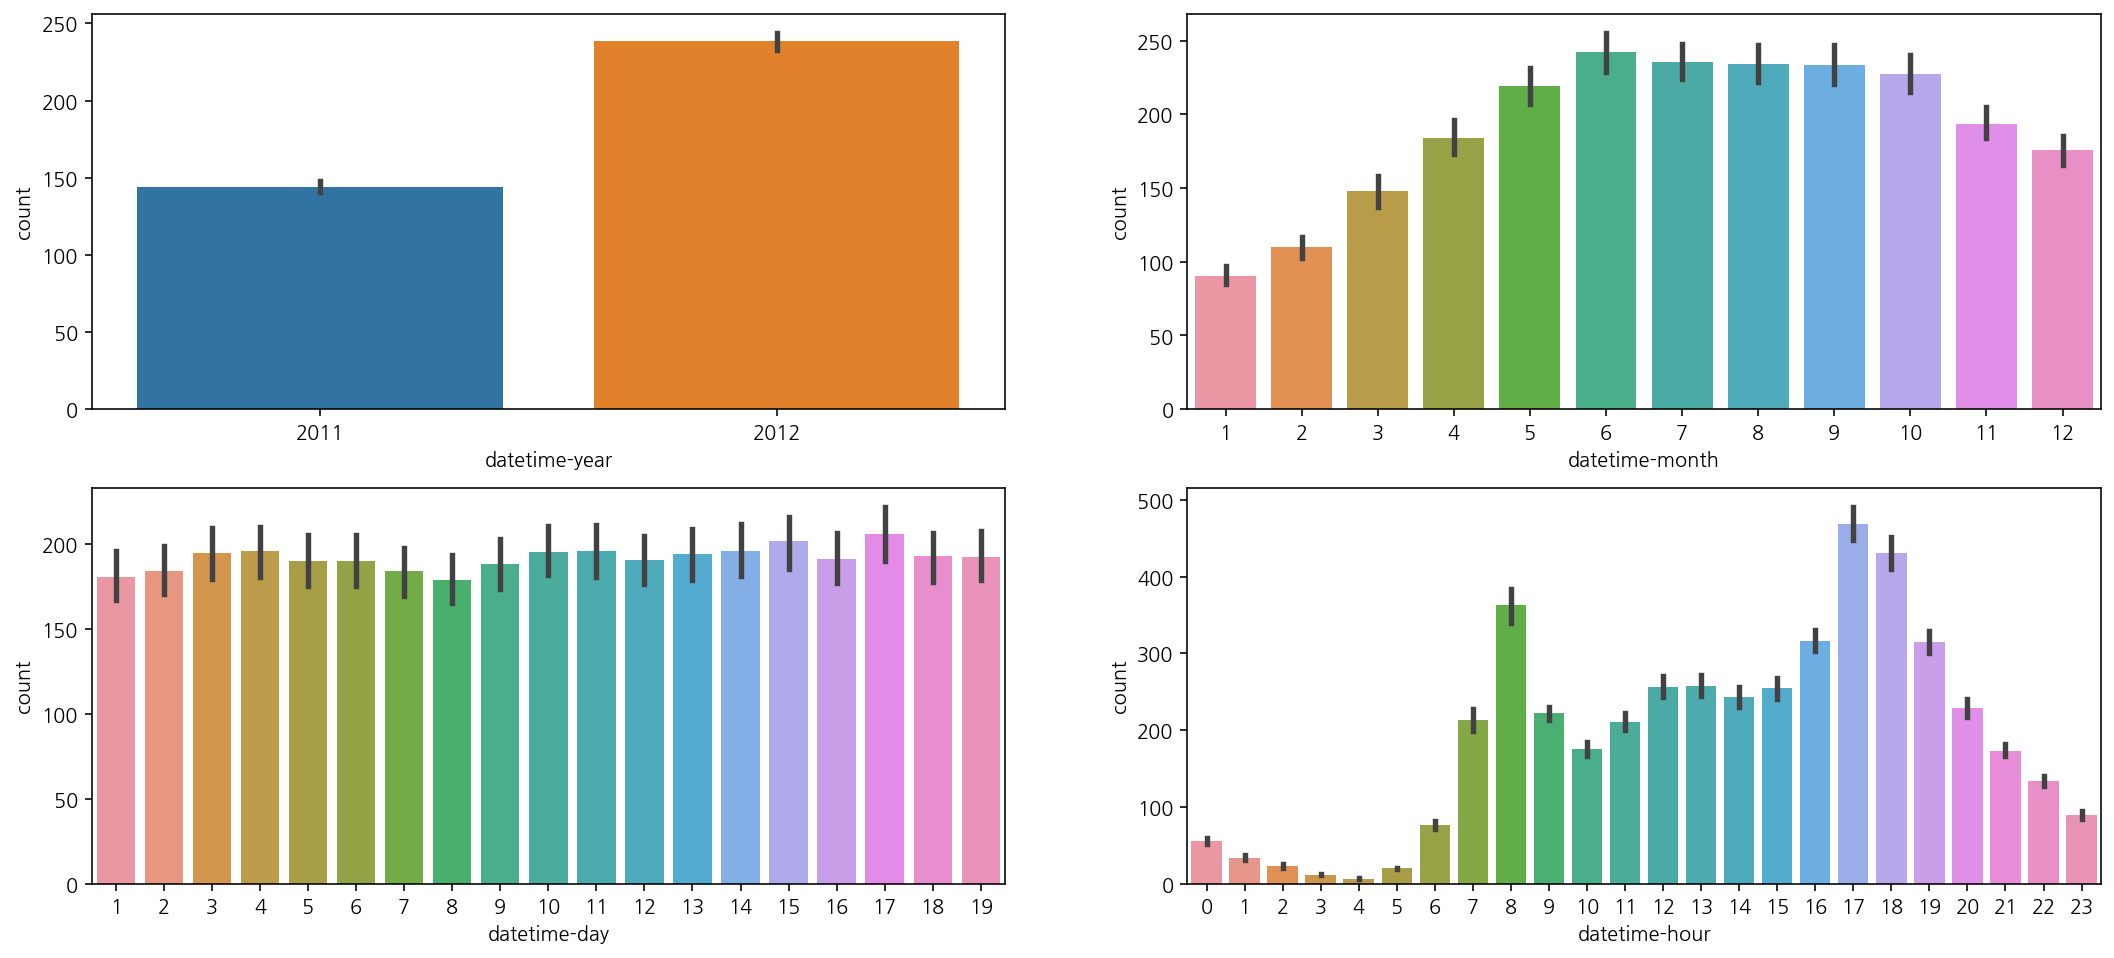

In [15]:
# 시간에 따른 count 값 시각화 분석
# subplot 설정과 set_size_inches설정
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18, 8)

# seaborn의 barplot을 이용해 시간대 별로 count데이터를 시각화 해 봅니다
sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)

위 그래프에서 알 수 있는 내용은 다음과 같습니다.

**datetime-year**
* 2011년도의 자전거 대여량보다 2012년의 자전거 대여량이 높습니다. 이를 통해 알 수 있는 사실은, 이 경진대회를 주최한 [Capital Bikeshare](https://www.capitalbikeshare.com/)사가 꾸준히 성장하고 있다는 증거일 것입니다.

**datetime-month**
* 주로 여름(6~8월, 9월)에 많이 빌리며, 겨울(12월 ~ 2월)에는 자전거를 상대적으로 많이 빌리지 않습니다.
* 같은 겨울이라도 12월의 자전거 대여량이 1월의 자전거 대여량보다 **2배 가까이** 높습니다. 왜 그런지는 좀 더 자세하게 분석을 해봐야 알 것 같습니다.

**datetime-day**
* x축을 자세히 보면 1일부터 19일까지밖에 없습니다. 20일 이후의 데이터 부턴 **test 데이터**에 있습니다. 따라서 이 시각화를 통해 알 수 있는 것은 train(매년 매달, 1~19일치 데이터), test(매년 매달, 20 ~ 30(1)일치 데이터)라는 것이고 train, test데이터를 나누는 **기준**이 되는 컬럼입니다.
* 이런 경우 **datetime-day** 를 feature로 넣어주게 되면 특정 경우(기간, 범위)등에 대해서만 옳게되는 과적합(overfitting)현상이 발생할 수 있습니다. 따라서 이 컬럼을 사용하면 되려 정확도가 내려갈 가능성이 높으므로 해당 컬럼은 **feature**로 사용하지 않는 편이 바람직할 것 같습니다.

**datetime-hour**
* 새벽 시간에는 사람들이 자전거를 많이 빌리지 않으며, 오후 시간대(주 활동 시간대)에 상대적으로 자전거를 많이 빌리고 있습니다.
* 부각이 되는 시간대가 있는데 오전(7~9시)과, 오후저녁(17시~19시)입니다. 러시아워와 관련 있을 것 같습니다.

**datetime-minute & datetime-second**
* 이 컬럼들은 x축이 모두 0이므로 따로 기록이 되지 않는 것을 확인할 수 있습니다. 따라서 별도로 시각화를 진행하지 않았습니다.

### datetime year-month(연-월)

다음으로 조금 응용해서 연과 월을 붙여서 시각화를 진행해보겠습니다. 해당 시각화를 진행하기 위해 연과 월을 합친 새로운 컬럼을 생성합니다.

In [16]:
# datetime-year와 datetime-month를 합쳐 새로운 컬럼을 생성
# 하이픈(-)을 통해 합치므로 문자열 형태로 데이터를 변환 및 저장
train["datetime-year_month"] = train["datetime-year"].astype('str') + "-" + train["datetime-month"].astype("str")

print(train.shape)
train[["datetime", "datetime-year_month"]].head()

(10886, 36)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


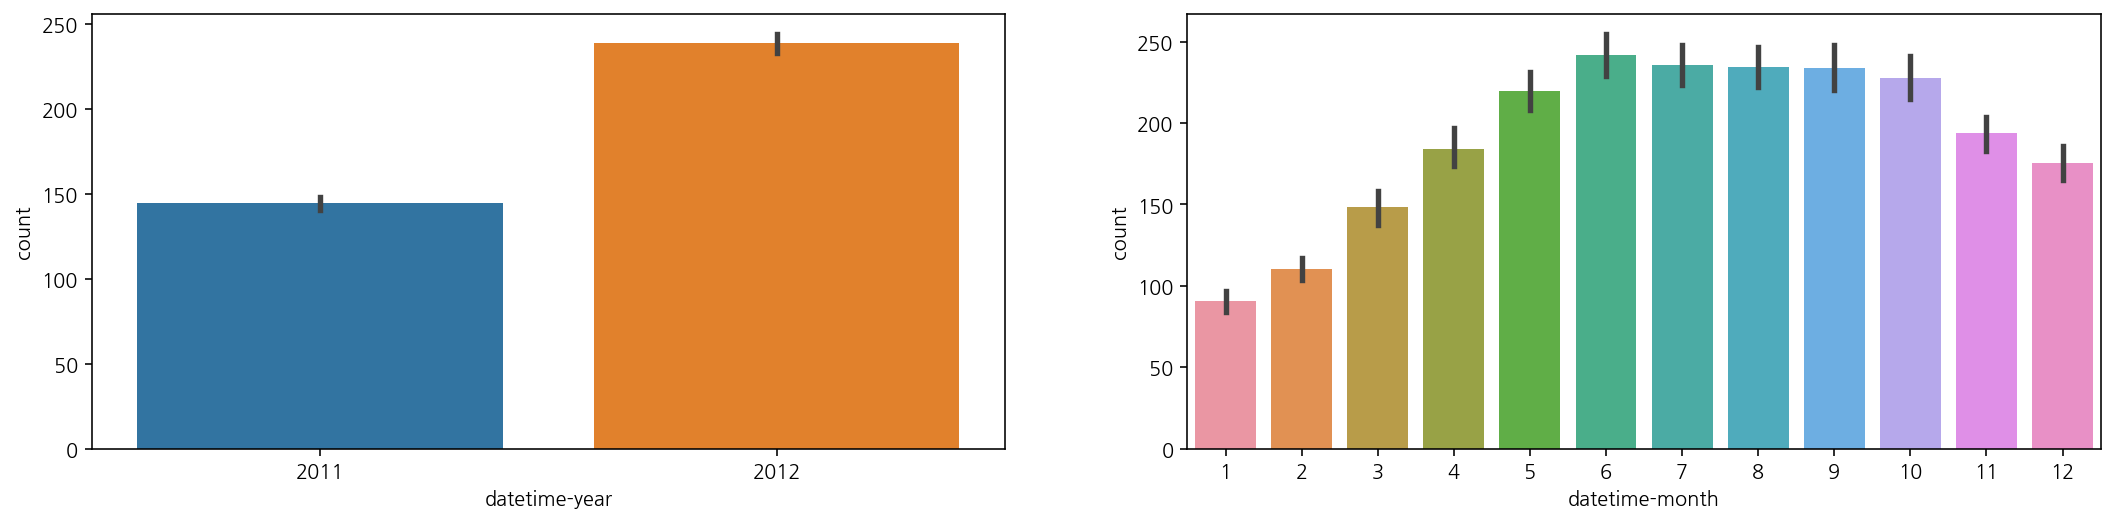

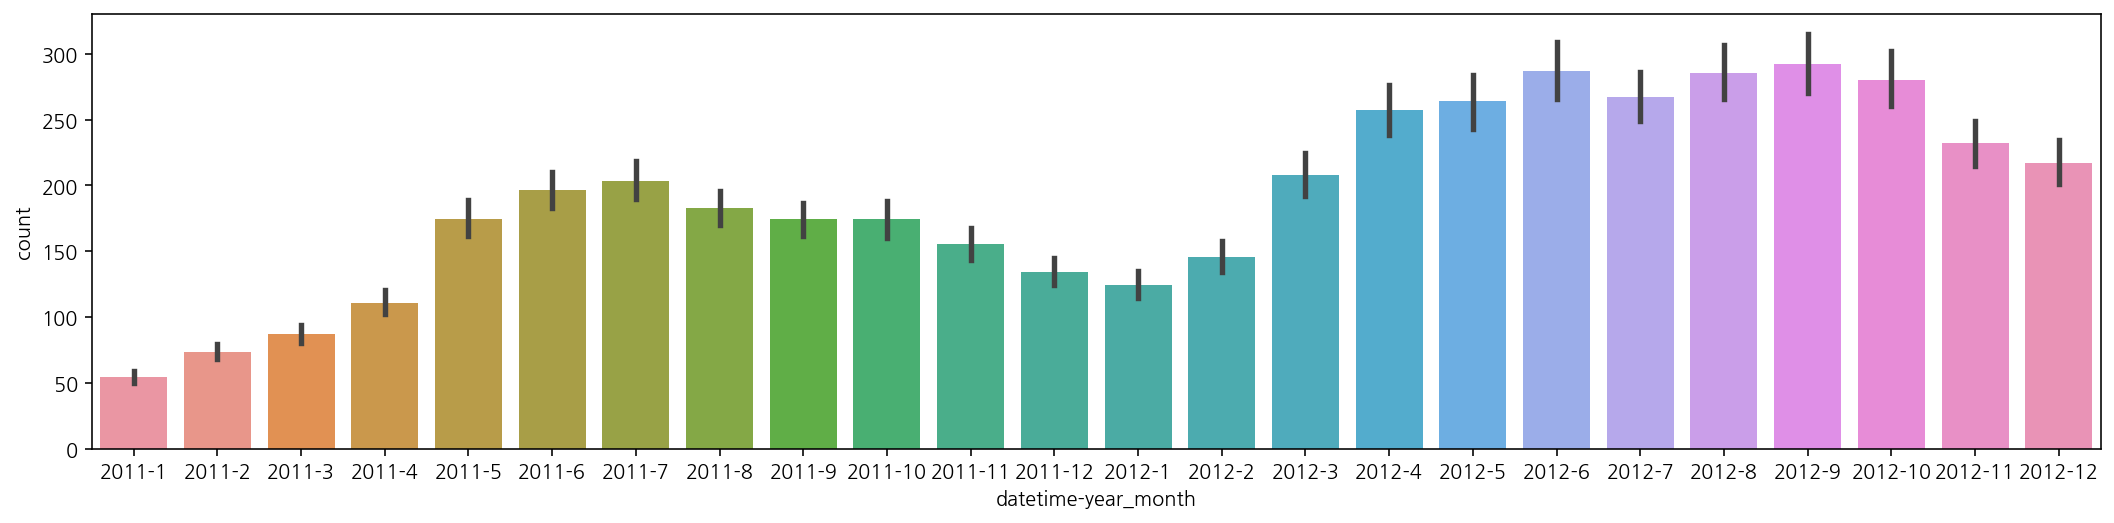

In [17]:
# 만든 데이터를 토대로 시각화를 진행해 봅니다.
# year와 month 따로 먼저 시각화를 하고 그 다음에 year_month 시각화 결과를 띄웁니다
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# 시각화의 전체 사이즈는 18x4로 설정.
figure.set_size_inches(18, 4)

# 연, 월별 자전거 대여량 시각화 출력
sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

# year_month 부분
figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

# 연-월 합산 자전거 대여량 시각화 출력
sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

위 시각화 결과에서 알 수 있는 내용은 다음과 같습니다.

* [Capital Bikeshare](https://www.capitalbikeshare.com/)사의 자전거 대여량은 꾸준히 상승하고 있습니다
* 우상단 시각화를 보면(month 시각화), 12월의 자전거 대여량이 1월의 자전거 대여량보다 2배가량 높습니다
* 하지만 아래의 시각화(year_month 시각화)를 살펴보면, 2011년 12월의 자전거 대여량과 2012년 1월으 ㅣ자전거 대여량이 큰 차이가 없다는 사실을 확인 할 수 있습니다(12월이 항상 1월보다 두배의 대여량이라는 말이 아님)
* 그렇지만 2011년 1월 보다 2012년 12월의 대여량이 차이가 큰 것을 확인 할 수 있습니다(2배가 벌어진 원인이 되는 차이)

따라서, 12월 대여량이 1월 대여량보다 2배가량 더 높은 이유는
1) 자전거 대여량이 해가 갈 수록 꾸준히 증가하는 추세에 맞물려서
2) 이 과정에서 2012년 12월의 증가폭이 컸기 때문 입니다.
고객이 12월에 더 많이 빌리고 1월에는 특별히 더 적게 빌리지는 않는 것입니다.

이 부분이 머신러닝 알고리즘에 **feature** 의 형태로 대입될 시 과적합(overfitting)이 될 소지가 있습니다.(12월은 1월보다 2배 가까이 높게 라던지) 다음과 같은 해결책이 있습니다.

* **datetime-year_month**를 통채로 **One-Hot Encoding**을 해서 feature로 사용한다.
* 자전거 대여량이 꾸준히 성장하는 추세에 맞춰 count를 보정한다

그러나 쉽고 빠르게 머신러닝 정확도를 올리는 방법으로선 비효율적인 측면이 있기 때문에 **datetime-month** 컬럼 데이터는 사용하지 않겠습니다.

정리하면, 시간과 관련된 6개의 데이터 중 ```datetime-year```, ```datetime-hour``` 이렇게 2가지만 사용하도록 하겠습니다.

### datetime-hour

다음으로, **datetime-hour** 컬럼을 좀 더 상세하게 시각화 후 분석해 보겠습니다.
**datetime-hour**컬럼과 더불어 ```workingday(근무일)```과 ```datetime-dayofweek(요일)```분석도 같이 진행 해 보겠습니다.

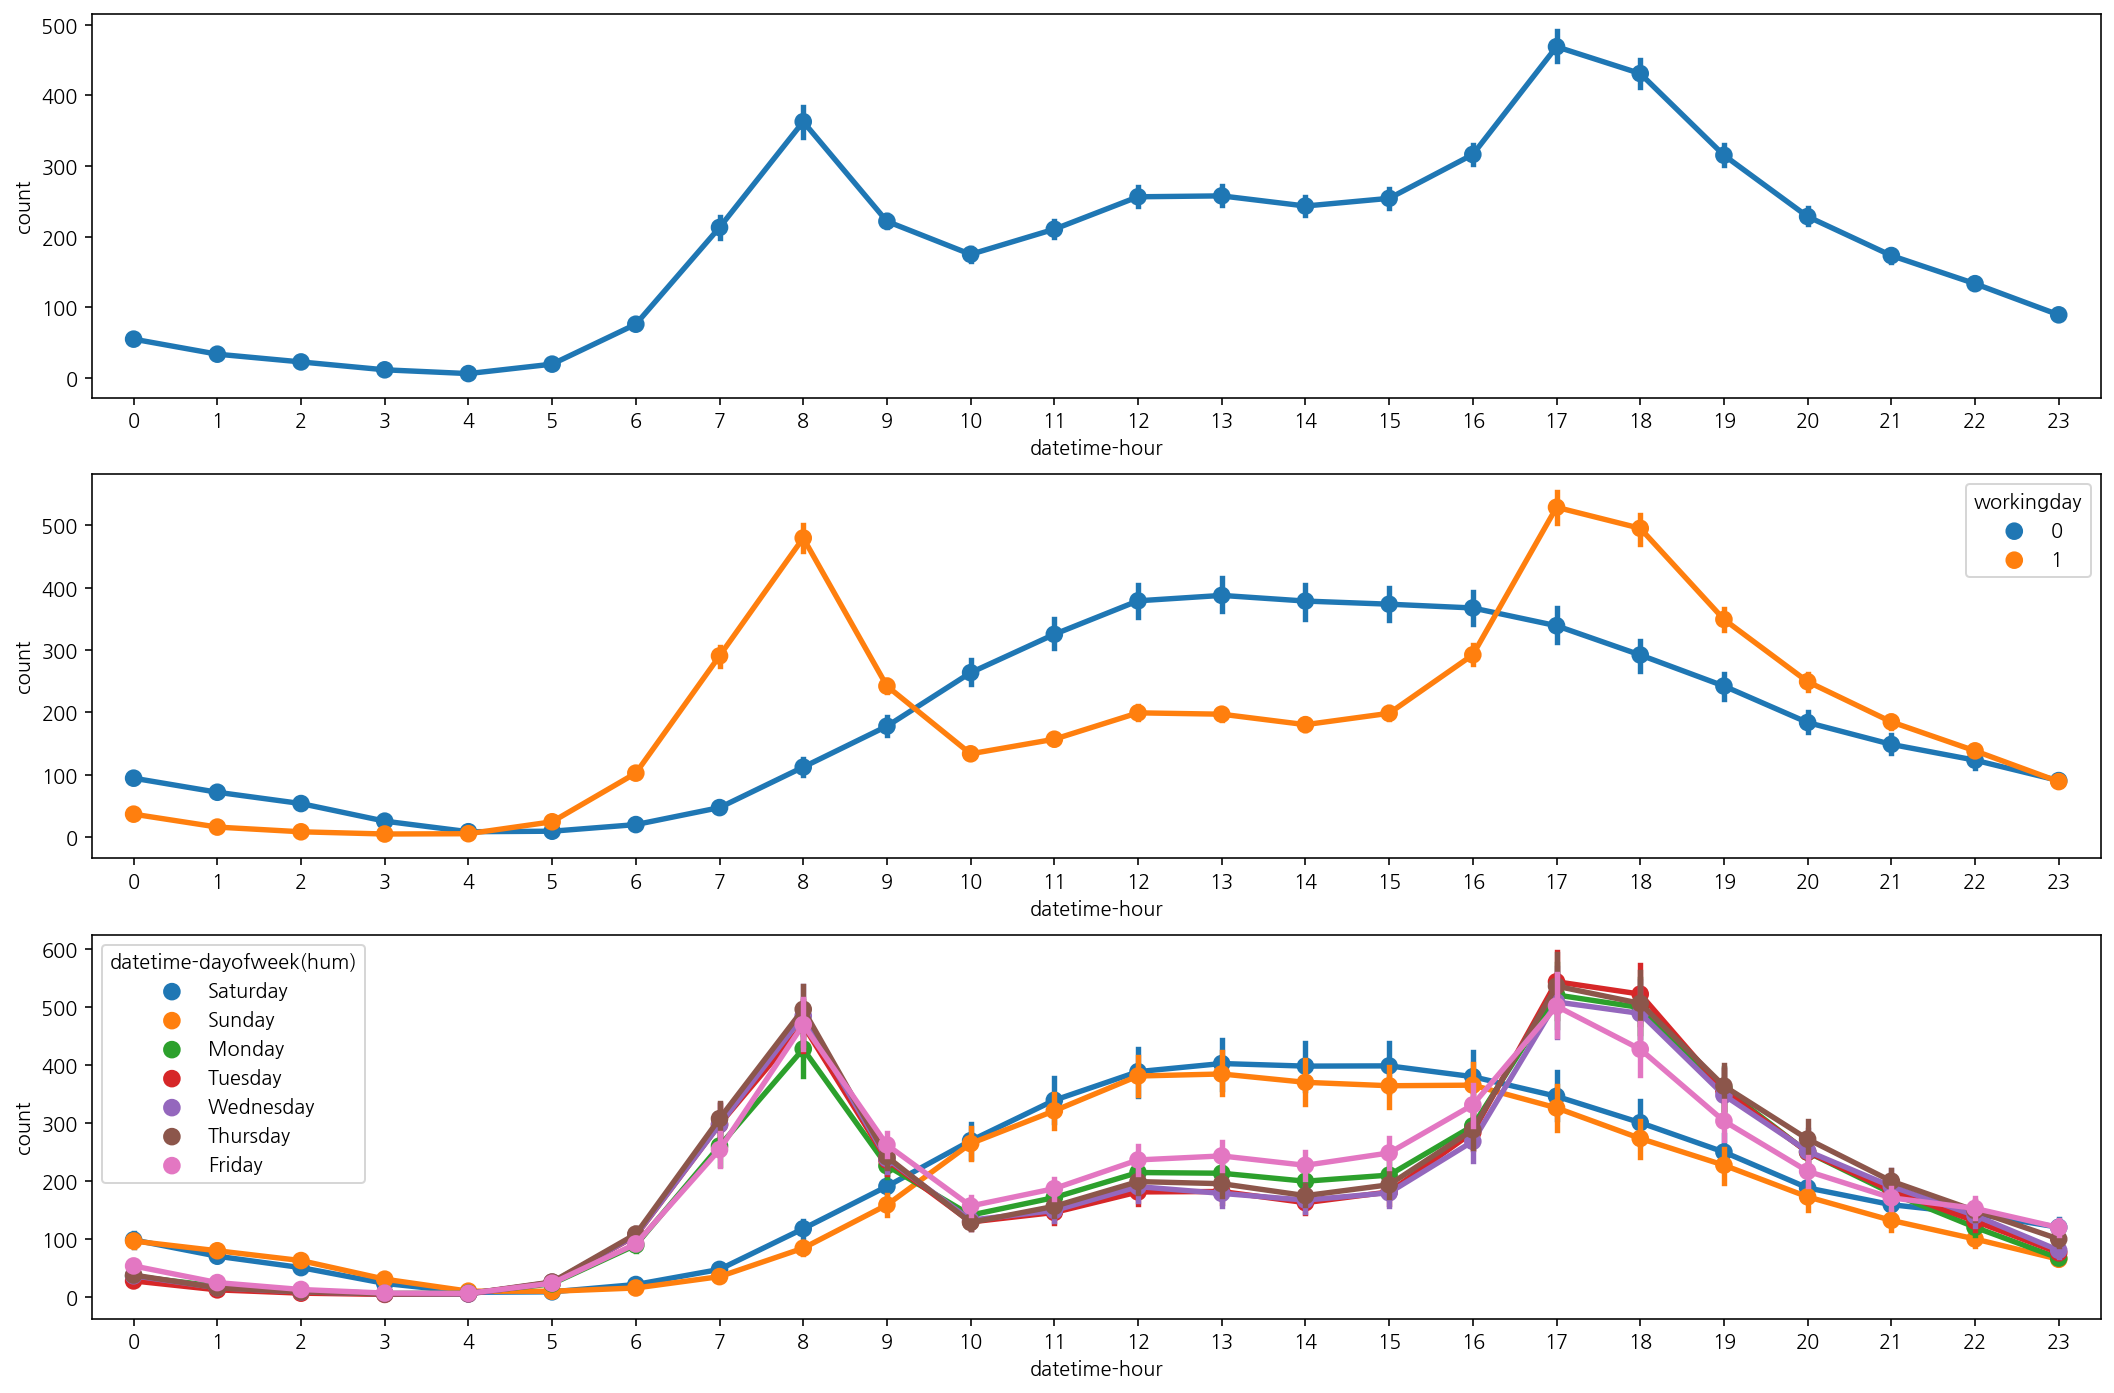

In [18]:
# subplot은 시각화 결과를 한 화면에 여러개를 띄울 수 있게 해 줍니다.
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

# 시각화 사이즈는 18x12로 설정합니다.
figure.set_size_inches(18, 12)

# seaborn의 pointplot으로 시각당 자전거 대여량을 시각화합니다.
sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)

# 위 시각화와 더불어 workingday에 따른 자전거 대여량도 같이 시각화합니다.
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)

# 마지막으로 요일에 따른 자전거 대여량 시각화도 진행해 봅니다.
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek(hum)", ax=ax3)

위 그림을 통해 알 수 있는 내용은 다음과 같습니다.

* 고객들은 기본적으로 출근 시간(7~9시)과 퇴근 시간(16~19시)에 자전거를 많이 빌립니다.
* 이는 근무일(workingday == 1)에 해당되는 경우이며, 근무일이 아닐 경우(workingday == 0), 사람들은 출/퇴근시간에 자전거를 빌리지 않고, 오후 시간(10~16시 사이)에 자전거를 주로 빌립니다.

**요일(datetime-dayofweek)**별 자전거 대여량을 살펴보면 다음과 같습니다.
* 먼저 금요일을 살펴보면, 다른 주중(월~목)에 비해 퇴근시간(17~19시)에 상대적으로 자전거를 덜 빌리는 사실을 확인할 수 있었습니다. 추측을 해보면, 다른 이유(불금을 즐긴다, 대중교통을 이용한다)로 자전거를 이용하지 않았을 것입니다.
* 금요일을 살펴보면, 다른 주중 대여량에 비해 오후 대여량이 높은 것을 확인할 수 있습니다. 그 다음으로 월요일이 많습니다. 금요일과 월요일 대여량은 오후에도 어느정도 수요가 된다는 사실을 추측해 볼 수 있습니다.
* 주말 데이터를 살펴보면 토요일의 대여량 보다 일요일의 대여량이 상대적으로 적은 것을 확인할 수 있었습니다. 이는, 대외활동 피로도와 연관이(금,토 바깥에서 즐기고 일요일은 실내에서 쉴 가능성)있을것 같습니다.

이 분석을 통해 머신러닝에 대입할 **feature**로 ```workingday```와 ```datetime-dayofweek```을 동시에 넣게 되면 좀 더 좋은 예측치를 얻을 수 있을 것 같다는 사실을 알게 되었습니다.

### season(계절)

이번에는 계절에 따른 자전거 대여량이 어떤지 경향을 분석해 보겠습니다.

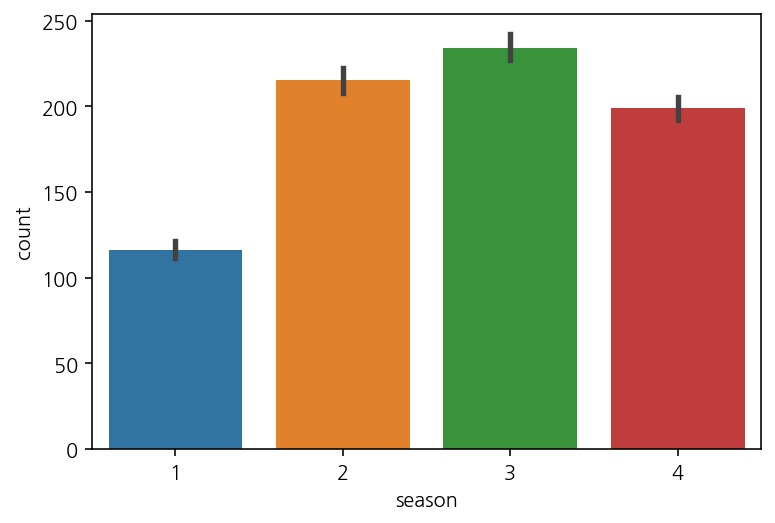

In [19]:
figure.set_size_inches(18, 12)
sns.barplot(data=train, x="season", y="count")

In [20]:
train["datetime-year_season"] = train["datetime-year"].astype('str') + "-" + train["season"].astype("str")

print(train.shape)
train[["datetime", "datetime-year_season"]].head()

(10886, 37)


,datetime,datetime-year_season
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


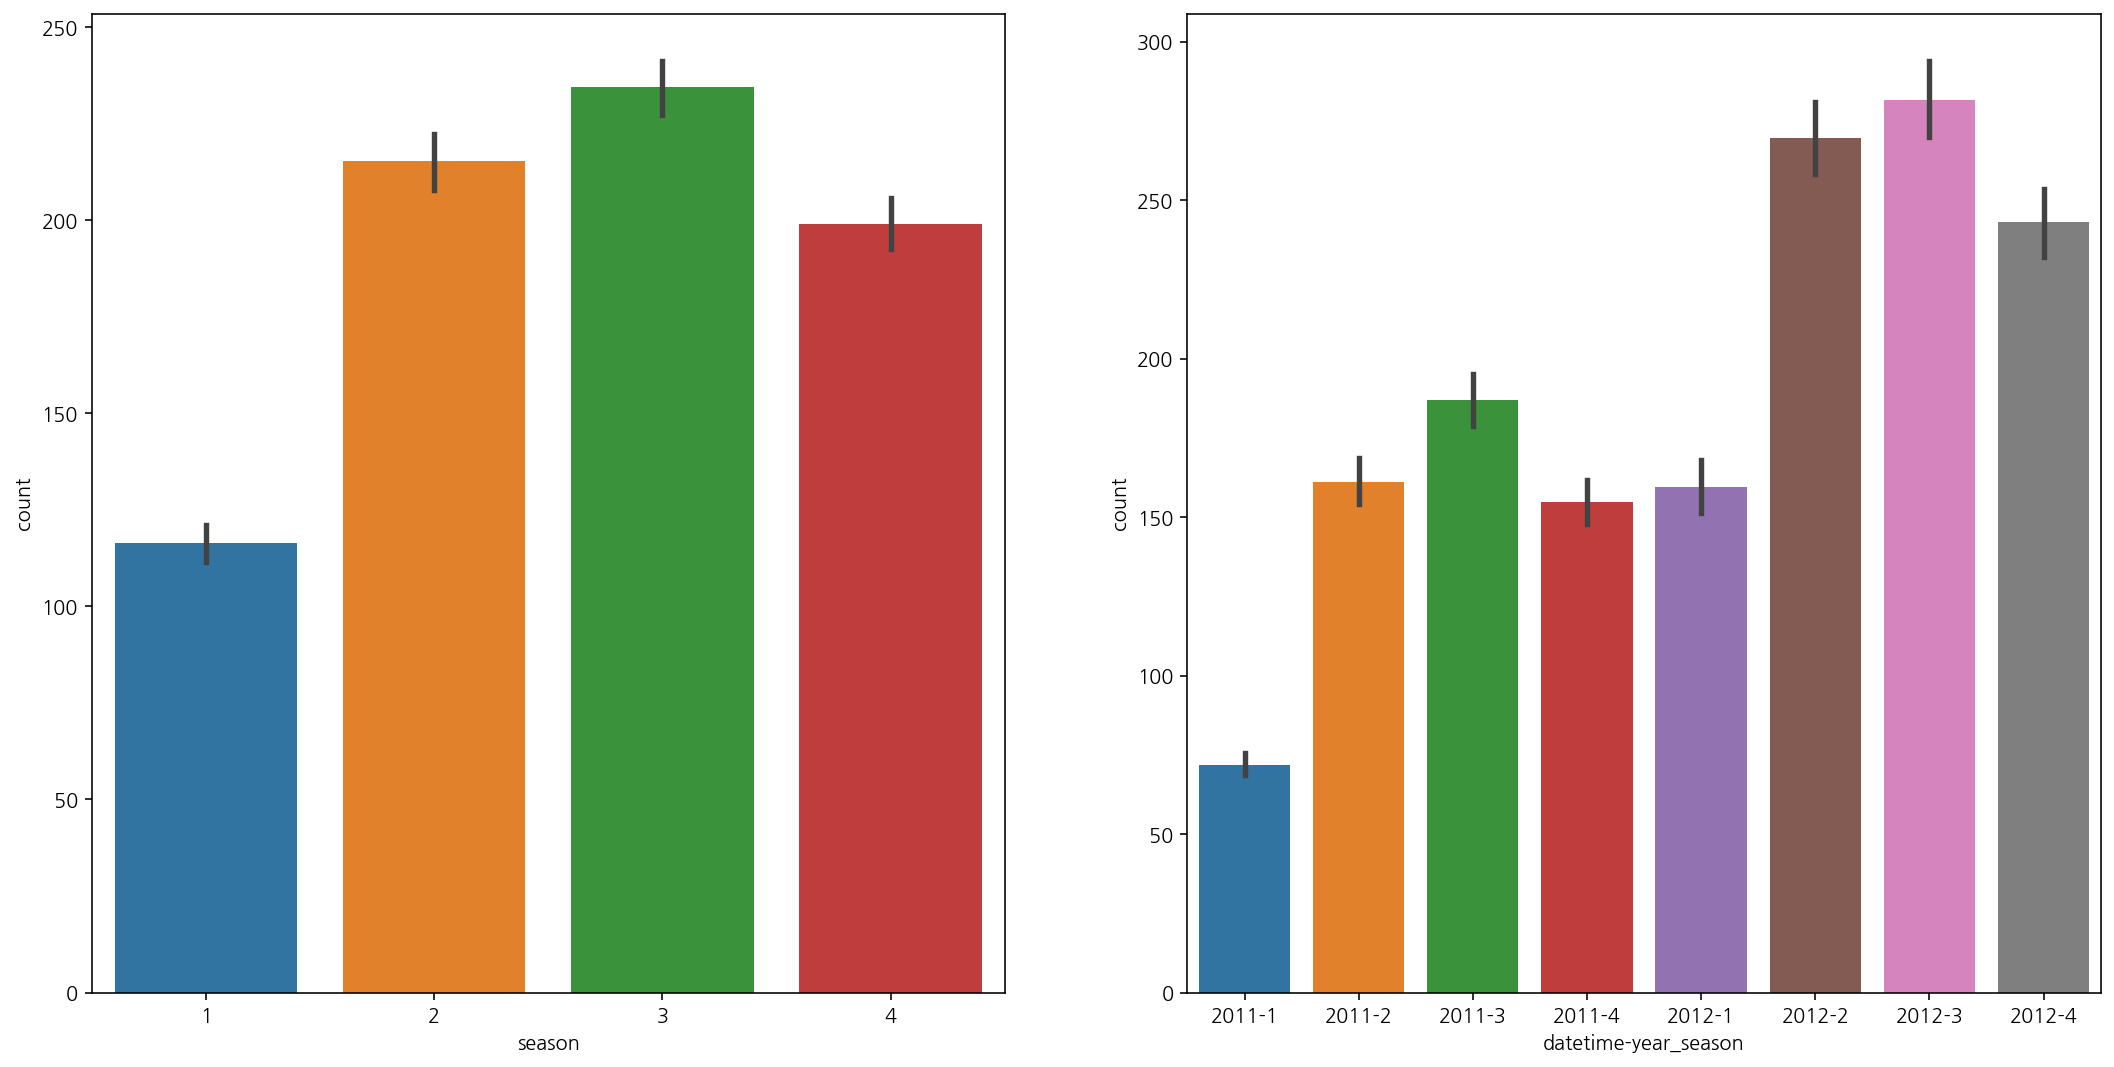

In [21]:
# 계절, 연-계절과 대여량의 관계를 확인하는 그래프를 그려봅니다.
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(18, 9)

sns.barplot(data=train, x="season", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-year_season", y="count", ax=ax2)

분석 결과, 계절에 따른 대여량의 경향성은 각 계절별로 두드러지고, 2011년과 2012년을 비교해 봤을 때 대여량의 차이는 있을 수 있지만 계절에 따른 경향성은 비슷한 것으로 보여집니다. 따라서 ```season``` 데이터는 머신러닝의 **feature**로 쓰이기 충분할 것 같습니다.

### weather(날씨)

다음으로 날씨에 따른 자전거 대여량의 변화에 대해 분석 및 시각화를 진행해 보겠습니다.

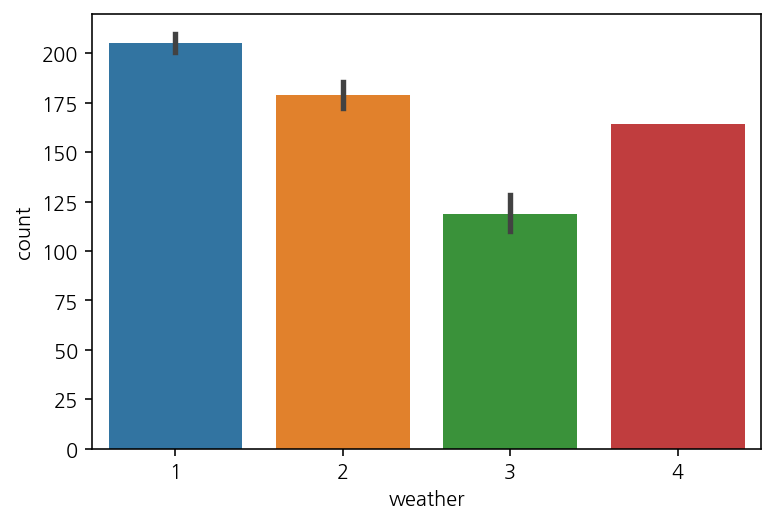

In [22]:
# 단순히 barplot으로 먼저 시각화 확인을 해봅니다
sns.barplot(data=train, x="weather", y="count")

In [23]:
train["datetime-year_weather"] = train["datetime-year"].astype('str') + "-" + train["weather"].astype("str")

print(train.shape)
train[["datetime", "datetime-year_weather"]].head()

(10886, 38)


,datetime,datetime-year_weather
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


In [24]:
train["datetime-year_weather"].unique()

array(['2011-1', '2011-2', '2011-3', '2012-1', '2012-2', '2012-3',
       '2012-4'], dtype=object)

In [25]:
# 데이터들 중 이상점(outlier)가 있는 것을 확인
# 가장 좋지 않은 날씨(비, 눈 날씨에 자전거 대여량이 높고 그런날이 하루 있음)에 대여량이 비정상적으로 높은것을 확인
# 해당 데이터는 빼는 것이 좋을 듯 싶습니다
train.loc[train["weather"] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(hum),season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,datetime-year_month,datetime-year_season,datetime-year_weather
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,0,0,0,Monday,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,2012-1,2012-1,2012-4


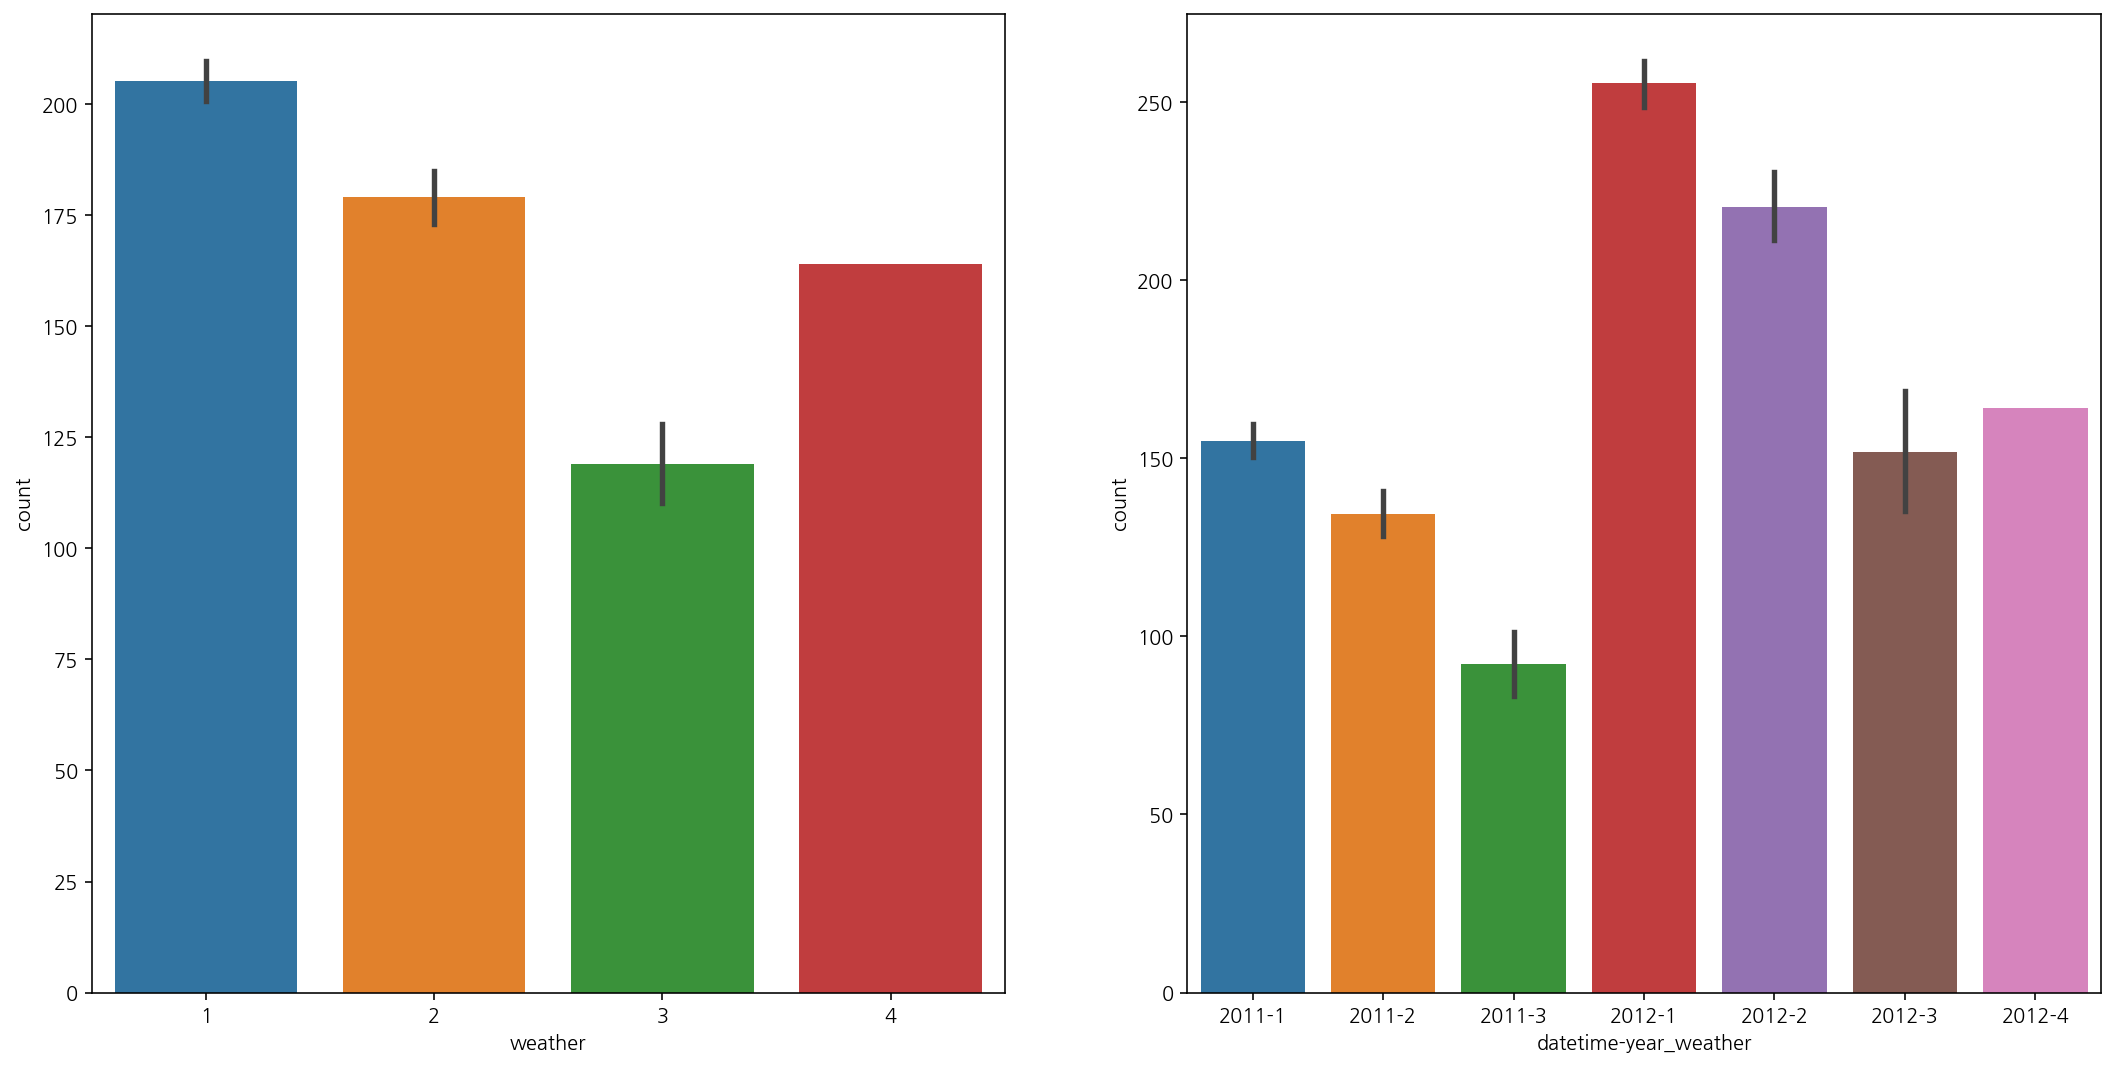

In [26]:
# 날씨, 연-날씨와 대여량의 관계를 확인하는 그래프를 그려봅니다.
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(18, 9)

sns.barplot(data=train, x="weather", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-year_weather", y="count", ax=ax2)

위 데이터들로 분석을 진행해 본 결과, 2012년도의 날씨들 중 우박이나 비가 오는 날이 하루가 있는데, 해당 날의 대여량을 살펴보면 비정상적으로 높은 것을 확인할 수 있었습니다. 우박이나 비가 올 때 안전상의 이유도 있지만 자전거를 타기가 어렵습니다.

* 해당 데이터는 학습 정확도를 높이기 위해서 **뺀 다음** 진행하는 것이 좋을 듯 싶습니다.
* 나머지는 날씨 단독으로 볼 때와, 날씨-계절별로 연계해서 볼 때 계절별 경향성이 뚜렷하기 때문에 **feature**로 사용하기 적합합니다.

In [27]:
# 문제가 되었던 row를 삭제합니다
train = train.drop(5631, 0)
print(train.shape)
train[train["weather"] == 4] # 삭제가 된 것을 확인 할 수 있었습니다.

(10885, 38)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(hum),season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,datetime-year_month,datetime-year_season,datetime-year_weather


### temp(기온), atemp(체감기온), humidity(습도), windspeed(풍속)

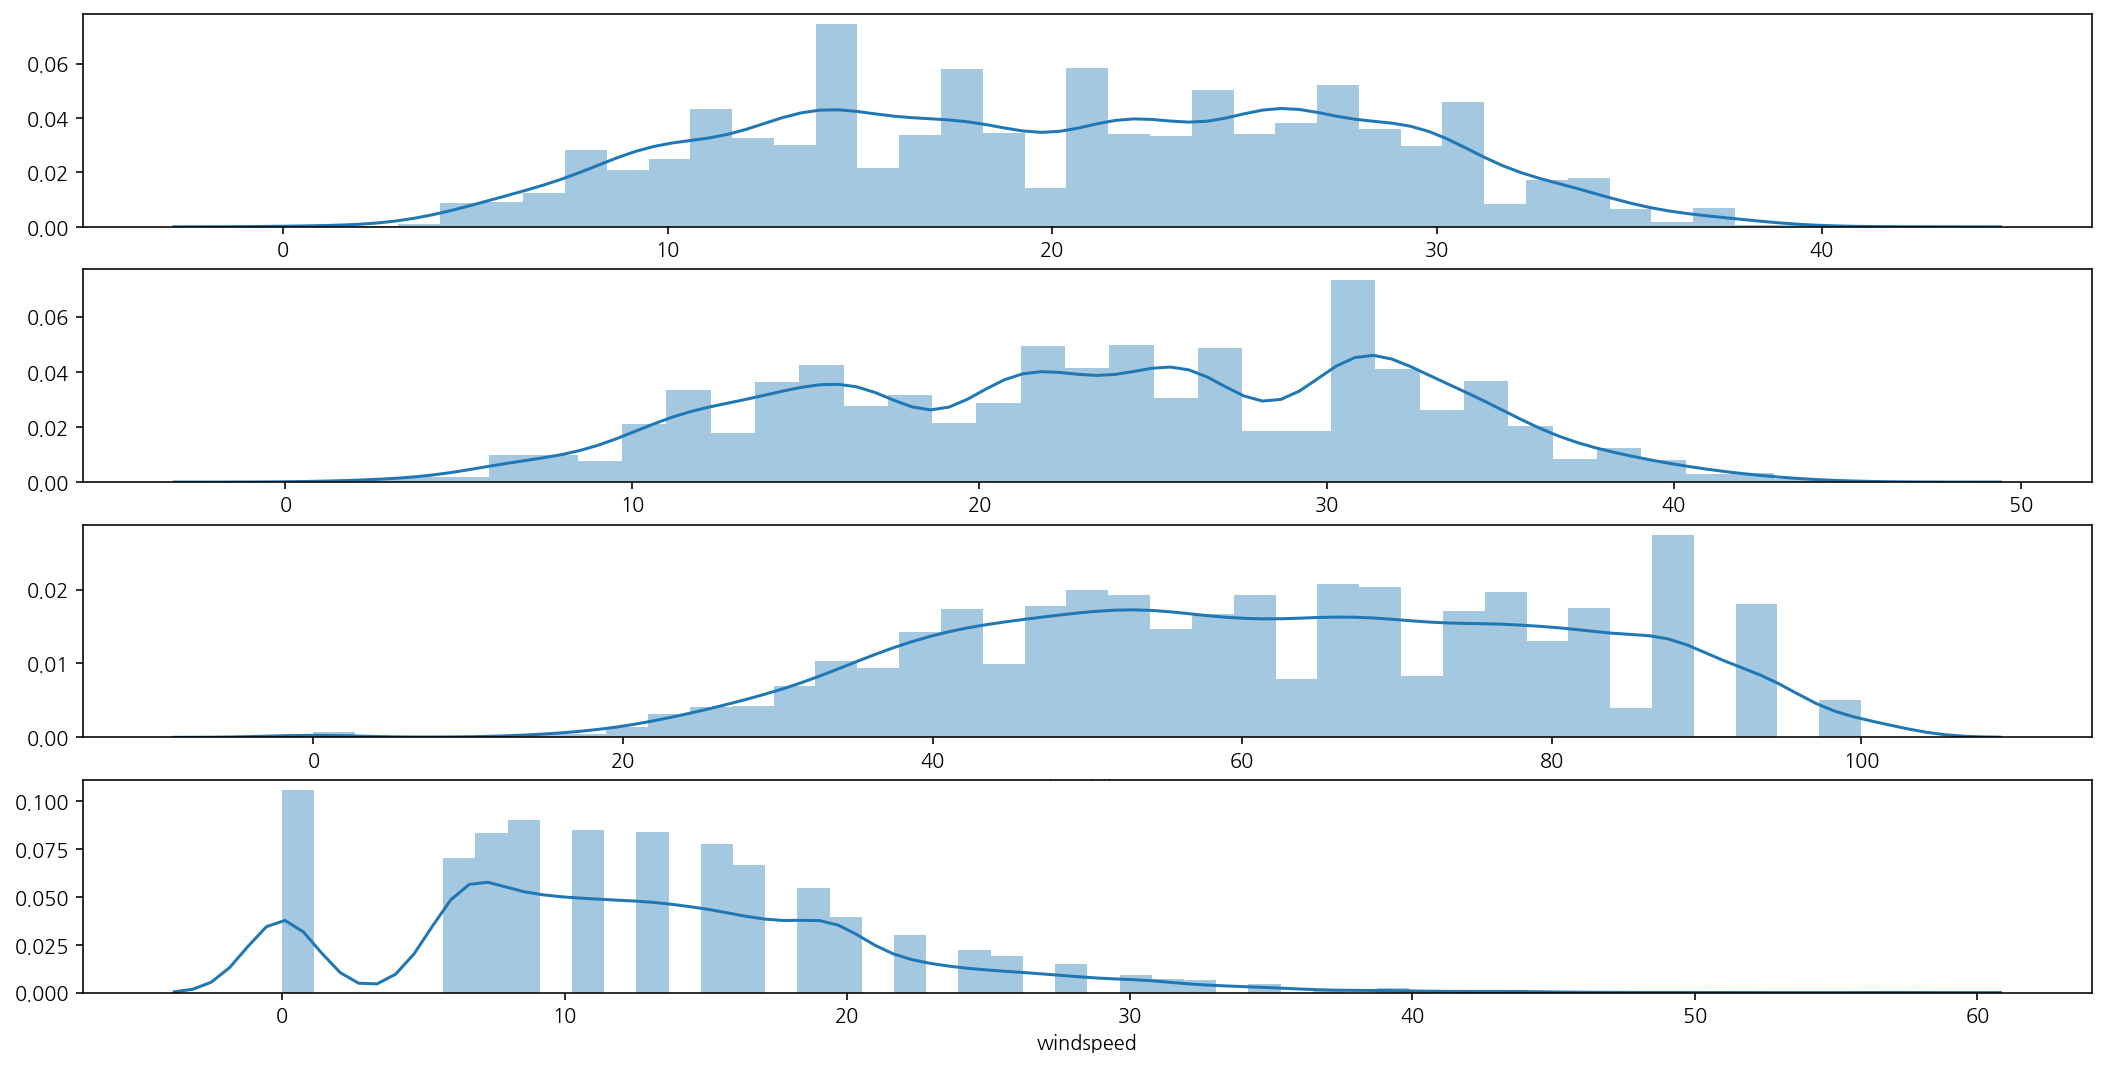

In [28]:
figure, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1)

figure.set_size_inches(18, 9)

sns.distplot(train["temp"], ax=ax1)

sns.distplot(train["atemp"], ax=ax2)

sns.distplot(train["humidity"], ax=ax3)

sns.distplot(train["windspeed"], ax=ax4)

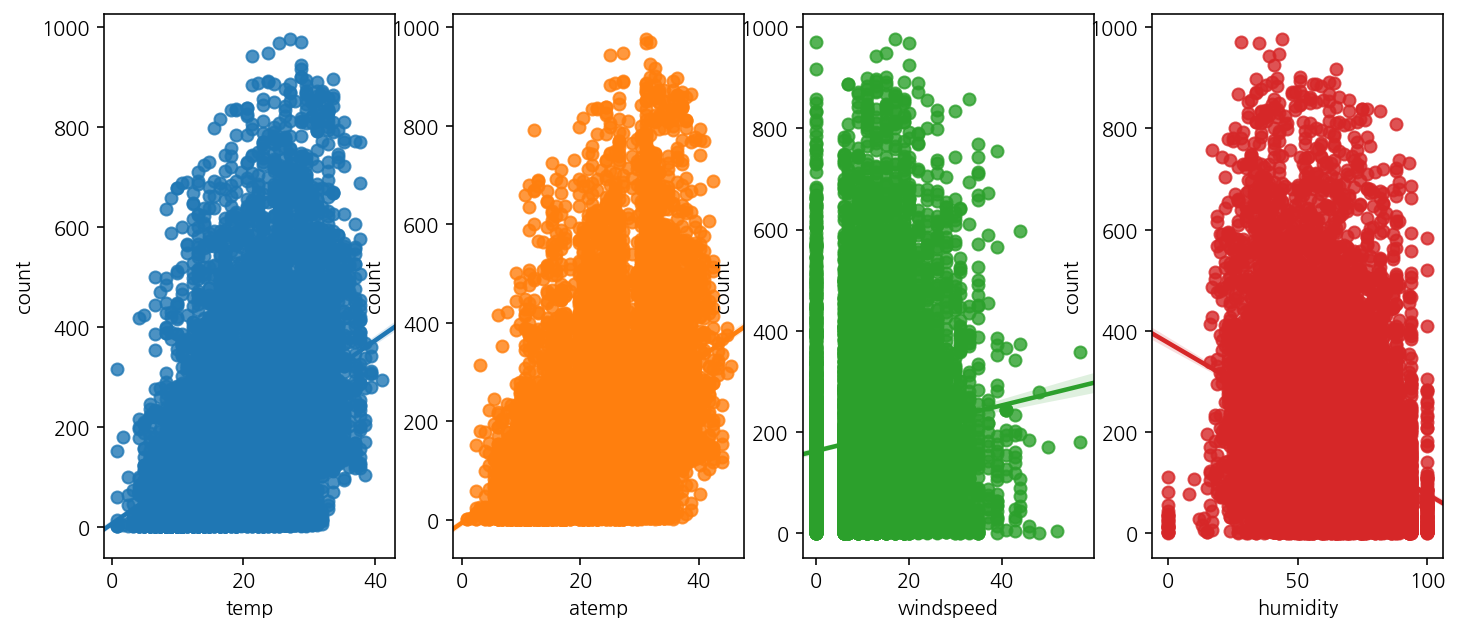

In [29]:
figure, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4)

figure.set_size_inches(12, 5)

sns.regplot(x="temp", y="count", data=train, ax=ax1)
sns.regplot(x="atemp", y="count", data=train, ax=ax2)
sns.regplot(x="windspeed", y="count", data=train, ax=ax3)
sns.regplot(x="humidity", y="count", data=train, ax=ax4)

In [30]:
train['windspeed'].unique()

array([ 0.    ,  6.0032, 16.9979, 19.0012, 19.9995, 12.998 , 15.0013,
        8.9981, 11.0014, 22.0028, 30.0026, 23.9994, 27.9993, 26.0027,
        7.0015, 32.9975, 36.9974, 31.0009, 35.0008, 39.0007, 43.9989,
       40.9973, 51.9987, 46.0022, 50.0021, 43.0006, 56.9969, 47.9988])

나머지 데이터들에 대해 시각화를 진행해 봤을 때 ```windspeed(풍속)```컬럼 데이터가 특히 0인 값들이 부자연스럽게 많았습니다. 이를 통해 추측할 수 있었던 사실은, 실제 풍속이 0일수도 있지만 계절과 시간대에 따른 풍속의 영향도 있을거라 고려 했을 때, 측정되지 않은 풍속은 모두 **0으로 처리**가 되어 있을 가능성이 있습니다. 따라서 0인 데이터들을 알맞게 다른 방법으로 **채우게** 된다면 정확도를 더 올릴 수 있는 가능성을 높일 수 있겠습니다. 떠올린 방법은

* 1. **train**, **test** 데이터에서 windspeed가 0인 값들을 0이 아닌 값들의 평균값으로 채우기
* 2. **train**, **test** 데이터를 합친 새로운 DF를 만들어 머신러닝 알고리즘에 학습(Random Forest)시킨 다음 0값에 해당하는 부분과 그렇지 않은 부분으로 나누어서 0값이 아닌 부분을 학습 시켜 0값인 부분에 채우기

등입니다. 실제로 0값을 채우는 부분은 이후 파트에서 진행해 볼 예정입니다.

### count 값 경향 분석

다음으로 분석할 컬럼은 **자전거 대여량(count)**입니다. 자전거 대여량(count)은 최종적으로 우리가 맞춰야 할 label이기 때문에 다른 컬럼들 보다 이 컬럼이 어떤 경향성을 가지고 있는지 제대로 이해하는 것이 중요합니다.

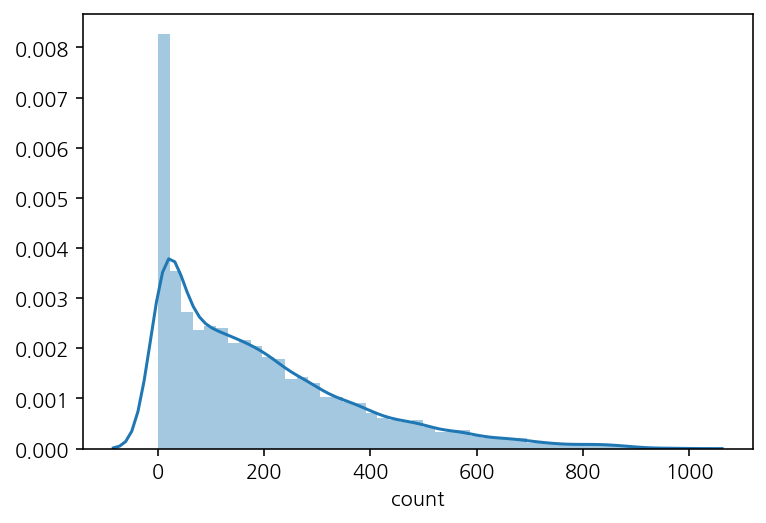

In [31]:
# 데이터 시각화를 통해 자전거 대여량(count)의 분포를 시각화 해 봅니다.
sns.distplot(train["count"])

위 그림에서 알 수 있는 내용은 다음과 같습니다.

* 자전거 대여량이 1 ~ 20대쪽이 가장 높습니다(정규분포가 치우쳐져 있다)
* 반대로 자전거 대여량이 1000대 가까이 되는 경우도 있습니다(max : 977대)

이렇게 데이터가 정규분포를 이루지 못하고 한쪽으로 치우쳐져 있게되면, 왜곡되어(skewed) 실제 학습과 예측시에도 정확한 결과를 얻기가 어렵습니다. 이 경우에는 **log transformation**을 시도하여 정규분포화 한 이후에 학습을 시도하면 좀 더 정확한 결과를 얻을 수 있습니다.

In [32]:
# https://www.kaggle.com/c/bike-sharing-demand/overview/evaluation를 참고하여 구합니다
# 자전거 대여량(count)에 +1을 더한 후 log를 적용합니다
train["log_count"] = np.log(train["count"] + 1)

# train 변수에 할당된 데이터의 행렬 사이즈를 출력.
print(train.shape)
# 실제로 log_count가 제대로 나왔는지 확인합니다.
train[["count", "log_count"]].head()

(10885, 39)


,count,log_count
0,16,2.833213
1,40,3.713572
2,32,3.496508
3,13,2.639057
4,1,0.693147


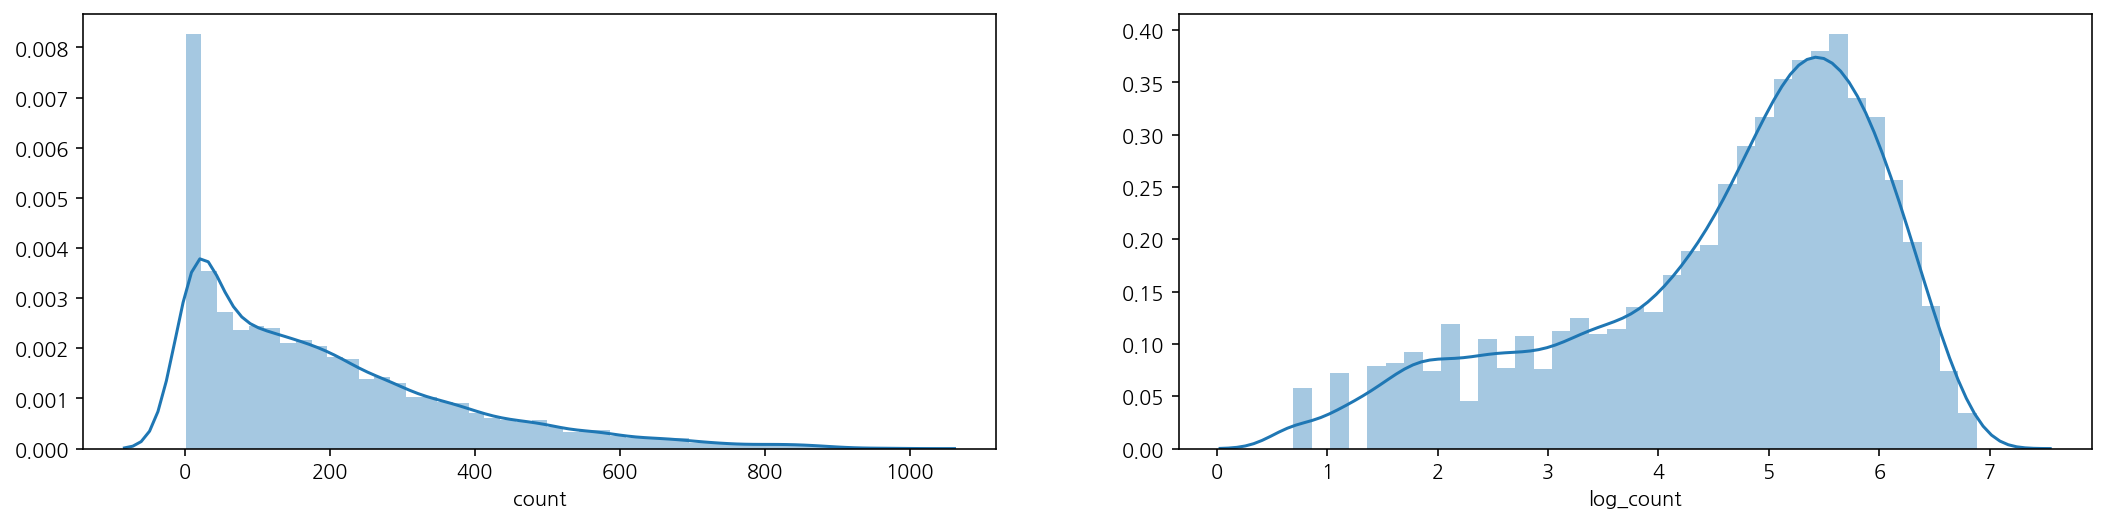

In [33]:
# 실제로 시각화를 진행하여 정규화가 이뤄 졌는지 확인합니다.
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# 사이즈는 18x4
figure.set_size_inches(18, 4)

# 좌측엔 이전 대여량의 분포, 우측에는 log_count의 분포를 보여줍니다
sns.distplot(train["count"], ax=ax1)
sns.distplot(train["log_count"], ax=ax2)

비교 결과, 왼쪽의 **count**분포 보다 오른쪽의 **log_count**분포가 좀 더 정규분포에 가까운 것이 확인 됩니다. 다시 말해, 자전거 대여량을 그대로 사용하는 것 보다 **log transformation**한 데이터를 사용 하는 것이 더 좋은 정확도를 낼 수 있다고 가정해 볼 수 있습니다.

다만 ```log_count```가 실제 대여량을 의미하는 것은 아니므로 실제 대여량을 확인하기 위해서는 exp함수를 사용하여 원복을 시켜주어야 합니다.

In [34]:
train["count(recover)"] = np.exp(train["log_count"]) - 1

print(train.shape)

train[["count", "log_count", "count(recover)"]].head()

(10885, 40)


,count,log_count,count(recover)
0,16,2.833213,16.0
1,40,3.713572,40.0
2,32,3.496508,32.0
3,13,2.639057,13.0
4,1,0.693147,1.0


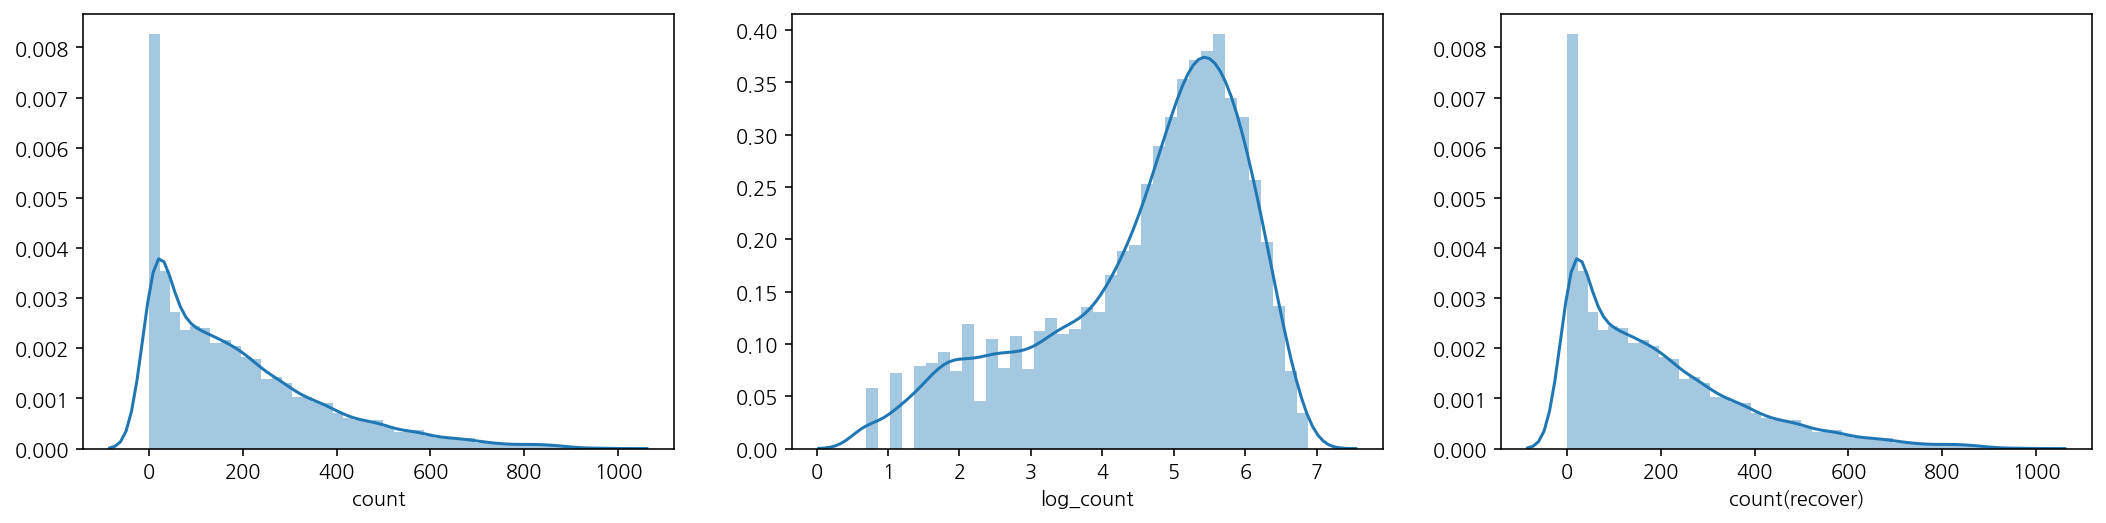

In [35]:
# count, log_count, count(recover)를 각각 비교해 봅니다
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

# 시각화의 전체 사이즈는 18x4로 설정합니다.
figure.set_size_inches(18, 4)

# 좌측에는 자전거 대여량(count)의 분포를 시각화합니다.
sns.distplot(train["count"], ax=ax1)

# 가운데에는 log transformation한 자전거 대여량(log_count)의 분포를 시각화합니다.
sns.distplot(train["log_count"], ax=ax2)

# 우측에는 log transformation을 다시 원상복귀한 버전(count(recover))의 분포를 시각화합니다.
sns.distplot(train["count(recover)"], ax=ax3)

## 머신러닝 파트(Machine Learning Part)

위 분석을 토대로 머신러닝을 적용해 봅니다.

역시 머신러닝 알고리즘에 적용하기 위해서는 아래의 과정이 상반됩니다.

* 적용할 모든 데이터들이 **수치화** 되어 있어야 한다.
* 넣을 값(**feature**)와 얻어낼 값(**label**)을 구분지어야 한다.

이번 경진대회에 적용할 Feature와, Label은 다음과 같습니다.

* **Feature**: 1) 계절(season : season_1, season_2, season_3, season_4), 2) 공휴일(holiday), 3) 근무일(workingday), 4) 날씨(weather : weather_1, weather_2, weather_3), 5) 온도(temp), 6) 체감온도(atemp), 7) 습도(humidity), 8) 풍속(windspeed), 9) 연도(datetime-year), 10) 시간(datetime-hour) 11) 요일(datetime-dayofweek : dayofweek_0, dayofweek_1, dayofweek_2, dayofweek_3, dayofweek_4, dayofweek_5, dayofweek_6)

* **Label**: log transformation을 적용한 자전거 대여량(log_count)

train 데이터와 test 데이터는 다음의 세 가지 형태의 값으로 나눠지게 됩니다.

* **X_train**: train 데이터의 feature입니다. 줄여서 **X_train**이라고 부릅니다.
* **X_test**: test 데이터의 feature입니다. 줄여서 **X_test**입니다.
* **y_train**: train 데이터의 label입니다. 줄여서 **y_train**입니다.

### Train

In [36]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour',
       'datetime-minute', 'datetime-second', 'datetime-dayofweek',
       'datetime-dayofweek(hum)', 'season_1', 'season_2', 'season_3',
       'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
       'dayofweek_0', 'dayofweek_1', 'dayofweek_2', 'dayofweek_3',
       'dayofweek_4', 'dayofweek_5', 'dayofweek_6', 'datetime-year_month',
       'datetime-year_season', 'datetime-year_weather', 'log_count',
       'count(recover)'],
      dtype='object')

In [37]:
# feature이름들을 모아 둔 feature_names 리스트를 정의
feature_names = ['season_1', 'season_2', 'season_3', 'season_4', 'holiday',
                 'workingday', 'weather_1', 'weather_2', 'weather_3', 'temp', 'atemp', 'humidity', 'windspeed',
                 'datetime-year', 'datetime-hour', 'dayofweek_0', 'dayofweek_1',
                 'dayofweek_2', 'dayofweek_3', 'dayofweek_4', 'dayofweek_5',
                 'dayofweek_6']

feature_names

['season_1',
 'season_2',
 'season_3',
 'season_4',
 'holiday',
 'workingday',
 'weather_1',
 'weather_2',
 'weather_3',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'dayofweek_0',
 'dayofweek_1',
 'dayofweek_2',
 'dayofweek_3',
 'dayofweek_4',
 'dayofweek_5',
 'dayofweek_6']

In [38]:
# label도 따로 이름을 변수에 정의해 줍니다.
label_names = 'log_count'
label_names

'log_count'

In [39]:
# feature_names 리스트를 활용하여 train 데이터에서 사용할 feature만 가져옵니다
X_train = train[feature_names]

print(X_train.shape)

X_train.head()

(10885, 22)


,season_1,season_2,season_3,season_4,holiday,workingday,weather_1,weather_2,weather_3,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,True,False,False,False,0,0,True,False,False,9.84,14.395,81,0.0,2011,0,False,False,False,False,False,True,False
1,True,False,False,False,0,0,True,False,False,9.02,13.635,80,0.0,2011,1,False,False,False,False,False,True,False
2,True,False,False,False,0,0,True,False,False,9.02,13.635,80,0.0,2011,2,False,False,False,False,False,True,False
3,True,False,False,False,0,0,True,False,False,9.84,14.395,75,0.0,2011,3,False,False,False,False,False,True,False
4,True,False,False,False,0,0,True,False,False,9.84,14.395,75,0.0,2011,4,False,False,False,False,False,True,False


In [40]:
# X_test도 위와 같이 진행해 줍니다
X_test = test[feature_names]

print(X_test.shape)

X_test.head()

(6493, 22)


,season_1,season_2,season_3,season_4,holiday,workingday,weather_1,weather_2,weather_3,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,True,False,False,False,0,1,True,False,False,10.66,11.365,56,26.0027,2011,0,False,False,False,True,False,False,False
1,True,False,False,False,0,1,True,False,False,10.66,13.635,56,0.0000,2011,1,False,False,False,True,False,False,False
2,True,False,False,False,0,1,True,False,False,10.66,13.635,56,0.0000,2011,2,False,False,False,True,False,False,False
3,True,False,False,False,0,1,True,False,False,10.66,12.880,56,11.0014,2011,3,False,False,False,True,False,False,False
4,True,False,False,False,0,1,True,False,False,10.66,12.880,56,11.0014,2011,4,False,False,False,True,False,False,False


In [41]:
# label_name을 활용, train 데이터의 label을 가져옵니다.
# 이를 y_train이라는 이름의 변수에 할당.
y_train = train[label_names]

print(y_train.shape)

y_train.head()

(10885,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: log_count, dtype: float64

### Evaluate

이번 경진대회에서 사용되는 **Root Mean Squared Logarithmic Error(RMSLE)**공식을 적용하여 학습한 모델의 성능이 얼마나 뛰어난지 정량적으로 측정합니다. (링크 참조 : [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand/overview/evaluation))

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

이 공식을 살펴 보면 정답($a_i$, actual value)과 예측값($p_i$, predict)의 차이가 크면 클수록 **패널티를 덜 주는** 방식으로 작동합니다.

이미 위 커널에서 log transformation한 count(log_count)를 사용하고 있기 때문에, 이 공식을 그대로 사용할 경우 **log를 두 번 적용한 샘**이 되므로 제거하고 상황에 맞게 변형하면 다음과 같습니다.

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (p_i - a_i)^2 } $$

위와 같은 공식을 **Root Mean Squared Error(RMSE)**라고 합니다. **RMSE**를 구하는 공식을 아래에서 구현해 보겠습니다.

In [42]:
# scikit-learn 패키지에 metrics 모듈에서 make_scorer라는 함수를 가지고 옵니다.
# 파이썬에서 구현한 공식을 scikit-learn에서 사용할 수 있도록 변환해 주는 함수입니다.
from sklearn.metrics import make_scorer

# RMSE 공식을 함수로 구현
def rmse(predict, actual):
    # 수학 연산(선형대수 연산)을 편하게 하기 위해 numpy array로 변환
    predict = np.array(predict)
    actual = np.array(actual)
    
    # p_i - a_i
    distance = predict - actual
    
    # (p_i - a_i)^2
    square_distance = distance ** 2
    
    # square_distance의 평균
    mean_square_distance = square_distance.mean()
    
    # 평균에 root를 씌웁니다
    score = np.sqrt(mean_square_distance)
    
    # 해당 score를 반환
    return score

# scikit-learn에 make_score를 활용
# rmse 함수를 scikit-learn의 다른 함수에서 사용할 수 있도록 변환합니다.
# 이 결과를 rmse_score라는 이름의 새로운 변수에 할당.
rmse_score = make_scorer(rmse)
rmse_score

make_scorer(rmse)

### Hyperparameter Tuning

머신러닝 모델에 바로 적용하기 전 가장 좋은 hyperparameter를 골라내는 작업을 진행해 봅니다.

머신러닝 모델 함수의 parameter들을 보면 다양한 parameter들이 있는 것을 확인할 수 있습니다. 이를 Hyperparameter라고 하는데 이 parameter의 값들 중 가장 예측도를 높일 수 있는 값을 찾아 낸다면 모델의 성능을 한층 더 높일 수 있습니다. 이러한 parameter를 찾는 작업을 **Hyperparameter Tuning**이라고 합니다. 

In [44]:
# scikit-learn 패키지의 ensemble 모듈에 있는 RandomForestRegressor를 가지고 옵니다.
# Classifier가 아닌 Regressor를 쓰는 이유 : 예측 하려고 하는 값이 특정 몇개의 범주로 나눠진 값이 아닌
# 연속된 수치를 구하는 것이므로 어떤 떨어지는 값으로 찍는 것이 아닌 '회귀'하는 경향을 보이는 것이 중요합니다
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor를 생성
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

H.P. Tuning의 방법은 크게 두가지가 있습니다.

* Grid Search

* Coarse & Finer Search

#### Grid Search

**Grid Search**란 몇 개의 Hyperparameter 후보군을 정한 뒤 이를 계속 조합해가며 가장 좋은 H.P.를 찾는 방식입니다. **Cross Validation**점수가 가장 좋은 H.P.를 가장 좋은 H.P.라고 간주합니다.(링크 참조 : [Grid Search](https://scikit-learn.org/stable/modules/grid_search.html))

In [53]:
# cross_val_score 함수를 불러옵니다.
from sklearn.model_selection import cross_val_score

# n_estimators : 사용할 트리의 갯수를 뜻합니다.
# 보통 트리를 많이 사용할 수록 성능이 좋아지지만, 실행속도가 오래 걸립니다.
# 따라서 컴퓨팅 성능이 좋지 않다면 적당한 값으로 시작하여 경향성을 파악하는 것이 좋습니다.
# 나머지 H.P.가 전부 튜닝 된다면, 그 다음에는 n_estimators를 최대한 높이는 식으로 합니다.
n_estimators = 300

# max_depth 후보군을 설정합니다. 10 ~ 90 사이에서 10 단위로 지정합니다.
max_depth_list = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# max_feature의 후보군을 지정합니다. 0.1 ~ 0.9 사이에서 0.2 단위로 지정합니다.
max_features_list = [0.1, 0.3, 0.5, 0.7, 0.9]

# hyperparameter 탐색결과를 저장할 리스트를 생성합니다.
hyperparameters_list = []

# 반복문으로 모든 max_depth의 후보군을 가져옵니다.
for max_depth in max_depth_list:
    for max_features in max_features_list:
        # Random Forest를 생성합니다 옵션에 대한 설명은 다음과 같습니다.
        # n_estimators : 트리의 갯수
        # max_depth : 트리의 깊이
        # max_features : Feature Sampling. 0.0 ~ 1.0 사이의 값을 넣으면 트리를 생성할 때 
        # 전체 feature에서 지정한 비율만큼만 feature를 사용하게 됩니다.
        # n_jobs : 병렬처리 여부를 설정합니다 (-1은 PC의 모든 코어를 사용하는 옵션이고)
        # random_state : RF의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다(seed value)
        model = RandomForestRegressor(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      max_features=max_features,
                                      n_jobs=-1,
                                      random_state=37)
        
        # cross_val_score를 실행합니다.
        # model : 점수를 측정할 머신러닝 모델이 들어갑니다
        # X_train : train 데이터의 feature 입니다.
        # y_train : train 데이터의 label 입니다.
        # cv : Cross Validation에서 데이터를 조각낼(split) 갯수입니다. 총 20조각을 내야하기
        # 때문에 20을 대입.
        # scoring : 점수를 측정할 공식입니다. RMSE를 여기에 대입합니다.
        # 이 함수의 실행 결과의 평균(mean)을 구해서 score라는 이름의 새로운 변수에 할당합니다.
        score = cross_val_score(model, X_train, y_train, cv=20, scoring=rmse_score).mean()
        
        # 탐색결과를 dictionary화 합니다.
        hyperparameters = {
            'score': score,
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'max_features': max_features,
        }
        
        # 해당 hyperparameters 딕셔너리를 리스트에 저장합니다.
        hyperparameters_list.append(hyperparameters)

# hyperparameters_list를 DF화 합니다.
hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)

# 변환할 hyperparameters_list를 score가 낮은 순으로 정렬
# (RMSE는 score가 낮을 수록 정확도가 높다)
hyperparameters_list = hyperparameters_list.sort_values(by='score')

# 행렬 사이즈 확인
print(hyperparameters_list.shape)

# hyperparameters_list의 상위 5개 확인
hyperparameters_list.head()

KeyboardInterrupt: 

#### Coarse & Finer Search

Grid Search는 좋은 방식이지만 한 가지 큰 단점을 가지고 있습니다. 바로 Grid Search로는 **거의 대부분의 경우 가장 좋은 H.P.를 찾을 수 없다**는 사실입니다.

만약에, 이 경진대회에서 가장 좋은 max_depth가 85라고 가정하면 Grid Search에선 찾을 수 없습니다 이미 max_depth_list에 존재하고 있지 않기에 탐색을 하지 않아서 입니다.

따라서 Grid Search를 통해서는 가장 좋은 H.P.에 근접한 다른 H.P.를 찾을 순 있지만 가장 좋은 H.P.를 찾는 것은 어렵습니다.

그래서 가장 좋은 H.P.를 찾기 위해선 **이론상으로 존재 가능한 모든 H.P.범위에서 랜덤하게 찾아서 Cross Validation을 해보면 됩니다.** 이 방식을 랜덤 서치(Random Search)라고 합니다.(해당 논문 참고 : [Random Search For Hyper-parameter Optimization](http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf))

그러나, 모든 H.P.를 탐색하려면 시간이 매우 오래걸리기 때문에, 이 방식을 응용한 다른 H.P.튜닝 방식이 있습니다. **Coarse & Finer Search**입니다.

이 방식은 크게 1) Coarse Search와 2) Finer Search로 동작합니다.

* Coarse Search : Random Search를 하되, 이론상으로 존재 가능한 모든 H.P.의 범위를 집어넣습니다. 이렇게 Random Search를 하면 가장 좋은 H.P.를 찾는 것은 어렵지만, **좋지 않은 하이퍼패러미터를 정렬해서 후순위로 놓을 수 있습니다.**

* Finer Search : Coarse Search를 통해 나온 결과 중 좋지 않은 H.P.를 버린 뒤 다시 한 번 Random Search를 하는 것을 뜻합니다.

##### Coarse Search

In [54]:
# scikit-learn 패키지의 ensemble 모듈에 있는 RandomForestRegressor를 가지고 옵니다.
from sklearn.ensemble import RandomForestRegressor

# scikit-learn 패키지의 model_selection 모듈에 있는 cross_val_score 함수를 가지고 옵니다.
from sklearn.model_selection import cross_val_score

# n_estimators는 트리의 갯수입니다.
# 나머지 하이퍼패리미터가 전부 튜닝되면, 그 다음에는 n_estimators를 최대한 높이 주면 됩니다. (ex: 3,000 개)
n_estimators = 300

# 랜덤 서치를 반복할 횟수입니다.
# 보통 100번을 반복합니다.
num_epoch = 100

# hyperparameter 탐색 결과를 리스트로 저장합니다.
coarse_hyperparameters_list = []

# num_epoch 횟수만큼 랜덤 서치를 반복합니다.
for epoch in range(num_epoch):
    # 2에서 100 사이의 정수형(int) 값을 랜덤하게 생성하여 max_depth 변수에 할당합니다.
    max_depth = np.random.randint(low=2, high=100)

    # 0.1에서 1.0 사이의 실수형(float) 값을 랜덤하게 생성하여  max_features 변수에 할당합니다.
    max_features = np.random.uniform(low=0.1, high=1.0)

    # 모델을 생성합니다.
    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  n_jobs=-1,
                                  random_state=37)

    # cv score의 평균을 저장합니다.
    score = cross_val_score(model, X_train, y_train, cv=20, scoring=rmse_score).mean()
    
    # hyperparameter 탐색 결과를 딕셔너리화 합니다.
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }

    # hyperparameter 탐색 결과를 리스트에 저장합니다.
    coarse_hyperparameters_list.append(hyperparameters)

    # hyperparameter 탐색 결과를 출력합니다.
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

# coarse_hyperparameters_list를 Pandas의 DataFrame으로 변환합니다.
coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)

# 변환한 coarse_hyperparameters_list를 score가 낮은 순으로 정렬합니다.
# (RMSE는 score가 낮을 수록 더 정확도가 높다고 가정합니다)
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

# coarse_hyperparameters_list 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(coarse_hyperparameters_list.shape)

# coarse_hyperparameters_list의 상위 10개를 출력합니다.
coarse_hyperparameters_list.head(10)

 0 n_estimators = 300, max_depth = 29, max_features = 0.370291, Score = 0.39620
 1 n_estimators = 300, max_depth = 97, max_features = 0.648761, Score = 0.35576
 2 n_estimators = 300, max_depth = 43, max_features = 0.567184, Score = 0.36330
 3 n_estimators = 300, max_depth = 25, max_features = 0.518063, Score = 0.36703
 4 n_estimators = 300, max_depth = 22, max_features = 0.524659, Score = 0.36737
 5 n_estimators = 300, max_depth = 38, max_features = 0.752777, Score = 0.35347
 6 n_estimators = 300, max_depth = 21, max_features = 0.727905, Score = 0.35284
 7 n_estimators = 300, max_depth = 36, max_features = 0.717263, Score = 0.35431
 8 n_estimators = 300, max_depth = 59, max_features = 0.867966, Score = 0.35191
 9 n_estimators = 300, max_depth = 81, max_features = 0.532515, Score = 0.36642
10 n_estimators = 300, max_depth = 90, max_features = 0.441842, Score = 0.38452
11 n_estimators = 300, max_depth = 47, max_features = 0.830279, Score = 0.35164
12 n_estimators = 300, max_depth = 59, m

,epoch,max_depth,max_features,n_estimators,score
74,74,28,0.775015,300,0.351627
48,48,85,0.845540,300,0.351636
12,12,59,0.831257,300,0.351636
11,11,47,0.830279,300,0.351636
43,43,97,0.855066,300,0.351636
47,47,60,0.826313,300,0.351636
36,36,75,0.839506,300,0.351636
66,66,34,0.784873,300,0.351702
25,25,59,0.802138,300,0.351728
38,38,50,0.797631,300,0.351728


Coarse Search가 끝났으면, 상위 5 ~ 10개의 결과만 출력한 뒤 이 결과를 낸 H.P. 범위만 남겨놓고 다시 한 번 Random Search를 합니다. 이를 Finer Search라고 합니다.

예를 들어 위 Coarse Search를 통해, 다음의 하이퍼패러미터가 상위 5 ~ 10개 안에 들었다고 가정하겠습니다.

  * max_depth = 40개 ~ 100개
  * max_features = 0.6 ~ 1.0
  
이제 위 코드를 그대로 사용하되, 다음의 부분만 수정한 뒤 다시 한 번 Random Search를 진행합니다.

```
# 40에서 100 사이의 정수형(int) 값을 랜덤하게 생성하여 max_depth 변수에 할당합니다.
max_depth = np.random.randint(low=40, high=100)

# 0.6에서 1.0 사이의 실수형(float) 값을 랜덤하게 생성하여  max_features 변수에 할당합니다.
max_features = np.random.uniform(low=0.6, high=1.0) 
```

##### Finer Search

In [45]:
# scikit-learn 패키지의 ensemble 모듈에 있는 RandomForestRegressor를 가지고 옵니다.
from sklearn.ensemble import RandomForestRegressor

# scikit-learn 패키지의 model_selection 모듈에 있는 cross_val_score 함수를 가지고 옵니다.
from sklearn.model_selection import cross_val_score

# n_estimators는 트리의 갯수입니다.
n_estimators = 300

# 랜덤 서치를 반복할 횟수입니다.
# 보통 100번을 반복합니다.
num_epoch = 100

# hyperparameter 탐색 결과를 리스트로 저장합니다.
finer_hyperparameters_list = []

# num_epoch 횟수만큼 랜덤 서치를 반복합니다.
for epoch in range(num_epoch):
    # 40에서 100 사이의 정수형(int) 값을 랜덤하게 생성하여 max_depth 변수에 할당합니다.(수정되는 부분)
    max_depth = np.random.randint(low=28, high=100)

    # 0.6에서 1.0 사이의 실수형(float) 값을 랜덤하게 생성하여  max_features 변수에 할당합니다.
    max_features = np.random.uniform(low=0.7, high=1.0)

    # 모델
    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  n_jobs=-1,
                                  random_state=37)

    # 평균 cv. 스코어
    score = cross_val_score(model, X_train, y_train, cv=20, scoring=rmse_score).mean()
    
    # hyperparameter 탐색 결과를 딕셔너리화 합니다.
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }

    # hyperparameter 탐색 결과를 리스트에 저장합니다.
    finer_hyperparameters_list.append(hyperparameters)

    # hyperparameter 탐색 결과를 출력합니다.
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

# finer_hyperparameters_list를 Pandas의 DataFrame으로 변환합니다.
finer_hyperparameters_list = pd.DataFrame.from_dict(finer_hyperparameters_list)

# 변환한 finer_hyperparameters_list를 score가 낮은 순으로 정렬합니다.
finer_hyperparameters_list = finer_hyperparameters_list.sort_values(by="score")

# finer_hyperparameters_list 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(finer_hyperparameters_list.shape)

# finer_hyperparameters_list의 상위 10개를 출력합니다.
finer_hyperparameters_list.head(10)

 0 n_estimators = 300, max_depth = 42, max_features = 0.866912, Score = 0.35191
 1 n_estimators = 300, max_depth = 45, max_features = 0.991856, Score = 0.35255
 2 n_estimators = 300, max_depth = 34, max_features = 0.968724, Score = 0.35253
 3 n_estimators = 300, max_depth = 92, max_features = 0.744479, Score = 0.35346
 4 n_estimators = 300, max_depth = 82, max_features = 0.705276, Score = 0.35430
 5 n_estimators = 300, max_depth = 29, max_features = 0.927999, Score = 0.35223
 6 n_estimators = 300, max_depth = 76, max_features = 0.877313, Score = 0.35191
 7 n_estimators = 300, max_depth = 62, max_features = 0.997813, Score = 0.35255
 8 n_estimators = 300, max_depth = 69, max_features = 0.786779, Score = 0.35173
 9 n_estimators = 300, max_depth = 58, max_features = 0.957419, Score = 0.35255
10 n_estimators = 300, max_depth = 51, max_features = 0.887819, Score = 0.35191
11 n_estimators = 300, max_depth = 34, max_features = 0.861422, Score = 0.35162
12 n_estimators = 300, max_depth = 39, m

,epoch,max_depth,max_features,n_estimators,score
64,64,31,0.779972,300,0.351589
11,11,34,0.861422,300,0.351620
35,35,93,0.852076,300,0.351636
16,16,89,0.853285,300,0.351636
93,93,92,0.821598,300,0.351636
91,91,53,0.851068,300,0.351636
56,56,93,0.822582,300,0.351636
87,87,56,0.848984,300,0.351636
23,23,30,0.808030,300,0.351636
25,25,73,0.817052,300,0.351728


탐색 결과 다음의 H.P.가 가장 좋은 H.P.라는 것을 알 수 있었습니다.(위 결과 기준 epoch : 64, max_depth : 31, max_features : 0.779972 -> score : 0.351589)

In [46]:
# 가장 score가 낮은(RMSE) H.P.를 가져옵니다
best_hyperparameters = finer_hyperparameters_list.iloc[0]

# 각각 max_depth와 max_features를 가져옵니다
best_max_depth = best_hyperparameters["max_depth"]
best_max_features = best_hyperparameters["max_features"]

# best_max_depth와 best_max_features를 출력합니다.
print(f"max_Depth(best) = {best_max_depth}, max_features(best) = {best_max_features:.6f}")

max_Depth(best) = 31.0, max_features(best) = 0.779972


### Using Random Forest Regressor

**H.P. Tuning**을 통해 최적의 H.P.를 찾았다면, 이 H.P.를 이용하여 실제 머신러닝 모델에 학습 시킵니다.

이번에 사용할 머신러닝 알고리즘은 **랜덤 포레스트(Random Forest)**이고 기존 **의사결정 나무(Decision Tree)**의 향상된 버전이라고 보면 됩니다. 대부분의 경우 일반적인 Decision Tree보다 우수한 성능을 보장하며 대략적인 원리는 다음과 같습니다.

1. 데이터의 일부분을 임의로(랜덤하게) 가져옵니다. 이를 Random Sampling 또는 Bagging(Bootstrap aggregating)이라고 합니다. 이렇게 랜덤 샘플링한 데이터로 의사결정 나무(Decision Tree)를 하나 만듭니다.

2. 위 방식을 사용하게 되면 이론적으로 무제한의 트리를 만들 수 있습니다. 이 트리를 지정한 갯수만큼 생성합니다.

3. 생성한 트리끼리 투표를 합니다. 예를 들어 타이타닉 승객 데이터를 제공했을 때, 1000개의 트리 중 700개가 생존 300개가 사망이라고 판단내리면 해당 승객은 생존했다고 판단 내립니다. 반대로 400개가 생존, 600개가 사망했다고 판단내리면 해당 승객은 사망했다고 판단 내립니다.

이런 방식을 사용하게되면 단일 D.T 보다 더 나은 성능을 가져다 줄 수 있습니다.([링크참조](https://swalloow.tistory.com/92))

**scikit-learn**에 있는 랜덤 포레스트를 사용할 예정입니다.

In [43]:
# scikit-learn 패키지의 ensemble 모듈에 있는 RandomForestRegressor를 가지고 옴
from sklearn.ensemble import RandomForestRegressor

# 하이퍼파라미터 튜닝이 끝났고 트리의 갯수 중 가장 높은 갯수를 줍니다.
best_n_estimators = 3000

# 미리 하이퍼파라미터 튜닝한 파라미터 결과를 가져옵니다
best_max_depth = 31.0
best_max_features = 0.779972

# RandomForestRegressor를 생성합니다.
model = RandomForestRegressor(n_estimators=best_n_estimators,
                              max_depth=best_max_depth,
                              max_features=best_max_features,
                              random_state=37,
                              n_jobs=1)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=31.0,
                      max_features=0.779972, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=1,
                      oob_score=False, random_state=37, verbose=0,
                      warm_start=False)

### Fit

머신러닝 모델을 학습시키기 위해 fit함수에 ```X_train```, ```y_train```들을 대입합니다.

In [44]:
# RandomForestRegressor를 학습
# 해당 학습에는 fit 이라는 기능을 사용하며, train 데이터의 feature(X_train)과 label(y_train)을 집어넣는다
model.fit(X_train, y_train)

MemoryError: could not allocate 786432 bytes

### Predict

학습이 성공적으로 이루어 진다면, 이 Random Forest를 활용하여 test 데이터에 있는 자전거 대여량을 예측하는 작업을 진행합니다. ```model.predict```로 할 수 있으며, 여기서 ```X_test```가 필요합니다.

In [ ]:
# log_predictions 변수에 model.predict값을 대입
log_predictions = model.predict(X_test)

# 변수에 할당 된 데이터를 출력
print(log_predictions)

# log_predictions : 변수를 출력
log_predictions

**Random Forest**에서 예측한 것은 **자전거 대여량(count)**이 아닌 **log transformation**한 값이므로 다시 원복을 한 값을 predictions에 넣어 줍니다

In [ ]:
# 예측이 이루어진 실제 값을 저장하고 확인합니다
predictions = np.exp(log_predictions) - 1

print(predictions.shape)

predictions

### Submit

예측이 완료된 값을 Kaggle 제출 포멧에 맞추어 정리한 후 제출합니다.

In [ ]:
# Kaggle이 제공하는 포멧에 맞추어 정리한 후 제출합니다
submission = pd.read_csv("data/sampleSubmission.csv")

# 행렬 사이즈 출력 확인
print(submission.shape)

# 상위 5개의 데이터 확인
submission.head()

In [ ]:
# 제출 포멧에 실제 예측한 데이터를 대입합니다
submission["count"] = predictions

print(submission.shape)

submission.head()

In [ ]:
# 마지막으로 submission 변수에 들어간 값을 csv 형식의 데이터로 저장
submission.to_csv("data/random-forest_hp_tuning.csv", index=False)

## 출처

* DSSchool 기초 과정에서 배운 내용을 토대로 재구성 및 복습
* 데이터 전처리에 집중한 자전거 수요 예측하기 : https://www.kaggle.com/kwonyoung234/for-beginner
* EDA & Ensemble Model (Top 10 Percentile) : https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile